# Toy 01: measuring appearance & bias

HOWTO: run the dataset & model cells, then run either of the solution cells following by the analysis cell.

In [3]:
%load_ext autoreload

# Dataset

In [4]:
%autoreload
import datasets

images, labels, n_classes = datasets.dataset_appearance()
train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels = datasets.split_dataset(images, labels)

50 training samples
50 test samples
50 analysis samples


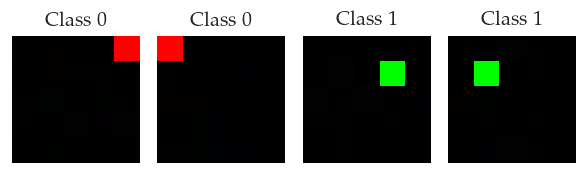

In [5]:
# Visualize dataset

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Palatino"]})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

fig, axs = plt.subplots(1, 4, figsize=(1 + 2 * 2, 2), dpi=120)
j = 0
for c in range(2):
    for i in range(2):
        inds = train_labels == c
        axs[j].imshow(train_images[inds][i].permute((1, 2, 0)))
        axs[j].set_title(f"Class {train_labels[inds][i]}")
        axs[j].axis('off')
        j += 1

plt.tight_layout()
pass

# Model

In [13]:
%autoreload
# from toy_models import TriViTalAppearance

# Handcrafted with negative

In [12]:
%autoreload

import training
from utils import toy_analysis

# Handcrafted weights
c = 2.
handcrafted_weights = {
    'patch_layer.weight': torch.tensor([[[[c]], [[0.]], [[0.]]]]),
    'patch_layer.bias': torch.tensor([0.]),
    'pos_embedding': torch.zeros((1, 1, 5, 5)),
    'block1.attn.query.weight': torch.tensor([[1.]]),
    'block1.attn.query.bias': torch.tensor([0.]),
    'block1.attn.key.weight': torch.tensor([[1.]]),
    'block1.attn.key.bias': torch.tensor([0.]),
    'block1.attn.value.weight': torch.tensor([[1.]]),
    'block1.attn.value.bias': torch.tensor([0.]),
    'block1.attn.out.weight': torch.tensor([[1.]]),
    'block1.attn.out.bias': torch.tensor([0.]),
    'block1.ffn.fc1.weight': torch.diag(torch.tensor([1.])),
    'block1.ffn.fc1.bias': torch.tensor([0.]),
    'block1.ffn.fc2.weight': torch.tensor([[2.]]),
    'block1.ffn.fc2.bias': torch.tensor([-c]),
    'fc.weight': torch.tensor([[1.], [-1.]]),
    'fc.bias': torch.tensor([0., 0.]),
    'block1.attn.rel_pos.emb_w.rel_pos_emb': torch.zeros((9, 1), dtype=torch.float32),
    'block1.attn.rel_pos.emb_h.rel_pos_emb': torch.zeros((9, 1), dtype=torch.float32),
}
model = TriViTalAppearance(d=1, handcrafted_weights=handcrafted_weights, pool='max', norm=False, residual=False)
training.test_toy(model, test_images, test_labels)

# Analysis
seed = 0
n_samples = None
targets = ['pred_class']
# targets = ['loss']
shape = 'scalar'
# targets = ['attn_out_sliced']
# shape = 'head'
patch_size = 1
exclude_bias = True

toy_analysis(targets, shape, patch_size, seed, n_samples, model, test_images, test_labels, exclude_bias=exclude_bias, attribution_method='input_gradient_withnegative')


No parameters to train!
Accuracy: 1.0


/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../analysis/learned_relative_position.py:170: RuntimeWarning: Mean of empty slice.
  return sf.mean()
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'appearance': tensor(0.5000),
 'position': tensor(0.),
 'relative_position': tensor(0.)}

# Handcrafted solution

In [6]:
%autoreload

import training
from utils import toy_analysis

# Handcrafted weights
c = 2.
handcrafted_weights = {
    'patch_layer.weight': torch.tensor([[[[c]], [[0.]], [[0.]]]]),
    'patch_layer.bias': torch.tensor([0.]),
    'pos_embedding': torch.zeros((1, 1, 5, 5)),
    'block1.attn.query.weight': torch.tensor([[1.]]),
    'block1.attn.query.bias': torch.tensor([0.]),
    'block1.attn.key.weight': torch.tensor([[1.]]),
    'block1.attn.key.bias': torch.tensor([0.]),
    'block1.attn.value.weight': torch.tensor([[1.]]),
    'block1.attn.value.bias': torch.tensor([0.]),
    'block1.attn.out.weight': torch.tensor([[1.]]),
    'block1.attn.out.bias': torch.tensor([0.]),
    'block1.ffn.fc1.weight': torch.diag(torch.tensor([1.])),
    'block1.ffn.fc1.bias': torch.tensor([0.]),
    'block1.ffn.fc2.weight': torch.tensor([[2.]]),
    'block1.ffn.fc2.bias': torch.tensor([-c]),
    'fc.weight': torch.tensor([[1.], [-1.]]),
    'fc.bias': torch.tensor([0., 0.]),
    'block1.attn.rel_pos.emb_w.rel_pos_emb': torch.zeros((9, 1), dtype=torch.float32),
    'block1.attn.rel_pos.emb_h.rel_pos_emb': torch.zeros((9, 1), dtype=torch.float32),
}
model = TriViTalAppearance(d=1, handcrafted_weights=handcrafted_weights, pool='max', norm=False, residual=False)
training.test_toy(model, test_images, test_labels)

# Analysis
seed = 0
n_samples = None
targets = ['pred_class']
# targets = ['loss']
shape = 'scalar'
# targets = ['attn_out_sliced']
# shape = 'head'
patch_size = 1
exclude_bias = True

toy_analysis(targets, shape, patch_size, seed, n_samples, model, test_images, test_labels, exclude_bias=exclude_bias)


No parameters to train!
Accuracy: 1.0


{'appearance': tensor(0.5000),
 'position': tensor(0.),
 'relative_position': tensor(0.)}

# Training solution

In [6]:
%autoreload
from experiments import run as run_appearance

/home/robert-jan/surfdrive/experiments/vit-position-info/models/irpe.py:14: UserWarning: [WARNING] The module `rpe_ops` is not built. For better training performance, please build `rpe_ops`.
  warnings.warn(RED_STR.format("[WARNING] The module `rpe_ops` is not built. \


### APE - full WD results

In [33]:
import pandas as pd
from io import StringIO

# results = """
# ,mean_acc,mean_appearance,mean_position,lr,pos_emb_factor,weight_decay,pos_emb_init
# 0,1.0,0.8077553510665894,0.19224464893341064,0.04,0.1,0.0,uniform
# 1,1.0,0.8077262043952942,0.19227376580238342,0.04,0.1,1e-08,uniform
# 2,1.0,0.8078967928886414,0.19210322201251984,0.04,0.1,1e-07,uniform
# 3,1.0,0.8125373125076294,0.18746264278888702,0.04,0.1,1e-06,uniform
# 4,1.0,0.8579667210578918,0.14203330874443054,0.04,0.1,1e-05,uniform
# 5,1.0,0.9893919229507446,0.010608123615384102,0.04,0.1,0.0001,uniform
# 6,1.0,0.9995611906051636,0.00043887487845495343,0.04,0.1,0.001,uniform
# 7,1.0,0.9979966282844543,0.002003270434215665,0.04,0.1,0.01,uniform
# 8,0.5,2.209769034422493e-09,0.4000000059604645,0.04,0.1,0.1,uniform
# 9,1.0,0.419734388589859,0.5802656412124634,0.04,1.0,0.0,uniform
# 10,1.0,0.4197832942008972,0.580216646194458,0.04,1.0,1e-08,uniform
# 11,1.0,0.42069706320762634,0.579302966594696,0.04,1.0,1e-07,uniform
# 12,1.0,0.4299778342247009,0.5700221657752991,0.04,1.0,1e-06,uniform
# 13,1.0,0.5306370258331299,0.4693629741668701,0.04,1.0,1e-05,uniform
# 14,1.0,0.9738417863845825,0.026158133521676064,0.04,1.0,0.0001,uniform
# 15,1.0,0.9994853138923645,0.0005147925694473088,0.04,1.0,0.001,uniform
# 16,1.0,0.9964656829833984,0.003534337505698204,0.04,1.0,0.01,uniform
# 17,0.5,0.0,0.10000000149011612,0.04,1.0,0.1,uniform
# 18,1.0,0.07397400587797165,0.9260260462760925,0.04,10.0,0.0,uniform
# 19,1.0,0.07400107383728027,0.9259990453720093,0.04,10.0,1e-08,uniform
# 20,1.0,0.07428214699029922,0.925717830657959,0.04,10.0,1e-07,uniform
# 21,1.0,0.07718725502490997,0.922812819480896,0.04,10.0,1e-06,uniform
# 22,1.0,0.11500360816717148,0.8849965333938599,0.04,10.0,1e-05,uniform
# 23,1.0,0.642539918422699,0.357460081577301,0.04,10.0,0.0001,uniform
# 24,1.0,0.7703779339790344,0.2296220362186432,0.04,10.0,0.001,uniform
# 25,1.0,0.6611717939376831,0.3388281464576721,0.04,10.0,0.01,uniform
# 26,0.5,6.201869950928085e-07,0.9999993443489075,0.04,10.0,0.1,uniform
# 0,1.0,0.8623360395431519,0.13766393065452576,0.04,0.1,0.0,trunc_normal
# 1,1.0,0.8622844815254211,0.13771562278270721,0.04,0.1,1e-08,trunc_normal
# 2,1.0,0.8623120188713074,0.13768795132637024,0.04,0.1,1e-07,trunc_normal
# 3,1.0,0.8661417961120605,0.13385826349258423,0.04,0.1,1e-06,trunc_normal
# 4,1.0,0.9021627306938171,0.09783722460269928,0.04,0.1,1e-05,trunc_normal
# 5,1.0,0.9958078265190125,0.00419219583272934,0.04,0.1,0.0001,trunc_normal
# 6,1.0,0.9991999864578247,0.000799992005340755,0.04,0.1,0.001,trunc_normal
# 7,1.0,0.9985566139221191,0.0014433700125664473,0.04,0.1,0.01,trunc_normal
# 8,0.5,0.04999999701976776,0.4000000059604645,0.04,0.1,0.1,trunc_normal
# """

results = """
,mean_acc,mean_appearance,std_appearance,mean_position,std_position,mean_relative_position,std_relative_position,lr,pos_emb_factor,weight_decay,position_mix,model_def,pe,target,d,n_heads
0,1.0,0.780376136302948,0.10212861001491547,0.21962392330169678,0.10212861746549606,0,0,0.004,0.1,0.0,0/2,appearance,APE,loss_all_classes,1,1
1,1.0,0.7803344130516052,0.10214459896087646,0.21966557204723358,0.10214459151029587,0,0,0.004,0.1,1e-08,0/2,appearance,APE,loss_all_classes,1,1
2,1.0,0.7803570032119751,0.10212842375040054,0.21964308619499207,0.10212843120098114,0,0,0.004,0.1,1e-07,0/2,appearance,APE,loss_all_classes,1,1
3,1.0,0.7801618576049805,0.10195450484752655,0.2198381870985031,0.10195450484752655,0,0,0.004,0.1,1e-06,0/2,appearance,APE,loss_all_classes,1,1
4,1.0,0.7868444919586182,0.09863235801458359,0.21315546333789825,0.09863235801458359,0,0,0.004,0.1,1e-05,0/2,appearance,APE,loss_all_classes,1,1
5,1.0,0.8872256278991699,0.10227276384830475,0.11277439445257187,0.10227277874946594,0,0,0.004,0.1,0.0001,0/2,appearance,APE,loss_all_classes,1,1
6,1.0,0.9768713116645813,0.047398027032613754,0.023128677159547806,0.04739801958203316,0,0,0.004,0.1,0.001,0/2,appearance,APE,loss_all_classes,1,1
7,1.0,0.9978248476982117,0.004438211675733328,0.0021750195883214474,0.004438208881765604,0,0,0.004,0.1,0.01,0/2,appearance,APE,loss_all_classes,1,1
8,0.5,0.9270512461662292,0.23236533999443054,0.07294874638319016,0.23236535489559174,0,0,0.004,0.1,0.1,0/2,appearance,APE,loss_all_classes,1,1
9,1.0,0.8623359799385071,0.0771813914179802,0.13766410946846008,0.0771813914179802,0,0,0.04,0.1,0.0,0/2,appearance,APE,loss_all_classes,1,1
10,1.0,0.8622843623161316,0.07705468684434891,0.13771562278270721,0.07705467939376831,0,0,0.04,0.1,1e-08,0/2,appearance,APE,loss_all_classes,1,1
11,1.0,0.8623121380805969,0.07674463838338852,0.13768789172172546,0.07674463838338852,0,0,0.04,0.1,1e-07,0/2,appearance,APE,loss_all_classes,1,1
12,1.0,0.8661417961120605,0.07436922192573547,0.13385829329490662,0.07436921447515488,0,0,0.04,0.1,1e-06,0/2,appearance,APE,loss_all_classes,1,1
13,1.0,0.902163028717041,0.052517376840114594,0.09783695638179779,0.052517395466566086,0,0,0.04,0.1,1e-05,0/2,appearance,APE,loss_all_classes,1,1
14,1.0,0.9958081245422363,0.003502447158098221,0.004191992338746786,0.0035024394746869802,0,0,0.04,0.1,0.0001,0/2,appearance,APE,loss_all_classes,1,1
15,1.0,0.9988123774528503,0.003787101013585925,0.001187648857012391,0.003787101712077856,0,0,0.04,0.1,0.001,0/2,appearance,APE,loss_all_classes,1,1
16,1.0,0.9987872242927551,0.0019004049245268106,0.0012128258822485805,0.001900400035083294,0,0,0.04,0.1,0.01,0/2,appearance,APE,loss_all_classes,1,1
17,0.5,0.049999989569187164,0.2179448902606964,0.4000000059604645,0.4898979365825653,0,0,0.04,0.1,0.1,0/2,appearance,APE,loss_all_classes,1,1
0,1.0,0.7803531885147095,0.10212650150060654,0.21964673697948456,0.10212650150060654,0.0,0.0,0.004,0.1,0.0,0/2,absolute,APE,loss_all_classes,1,1
1,1.0,0.7803252935409546,0.102144755423069,0.2196747064590454,0.1021447628736496,0.0,0.0,0.004,0.1,1e-08,0/2,absolute,APE,loss_all_classes,1,1
2,1.0,0.7803435325622559,0.1021570935845375,0.2196565419435501,0.10215707868337631,0.0,0.0,0.004,0.1,1e-07,0/2,absolute,APE,loss_all_classes,1,1
3,1.0,0.7801656723022461,0.10195714980363846,0.2198343575000763,0.10195713490247726,0.0,0.0,0.004,0.1,1e-06,0/2,absolute,APE,loss_all_classes,1,1
4,1.0,0.7868080139160156,0.09862473607063293,0.21319203078746796,0.09862476587295532,0.0,0.0,0.004,0.1,1e-05,0/2,absolute,APE,loss_all_classes,1,1
5,1.0,0.8874026536941528,0.10231411457061768,0.11259732395410538,0.10231409221887589,0.0,0.0,0.004,0.1,0.0001,0/2,absolute,APE,loss_all_classes,1,1
6,1.0,0.9768600463867188,0.04739267751574516,0.023139964789152145,0.04739265888929367,0.0,0.0,0.004,0.1,0.001,0/2,absolute,APE,loss_all_classes,1,1
7,1.0,0.9977657198905945,0.004431223496794701,0.002234248910099268,0.004431209061294794,0.0,0.0,0.004,0.1,0.01,0/2,absolute,APE,loss_all_classes,1,1
8,0.5,0.9350308179855347,0.2224450707435608,0.06496913731098175,0.2224450707435608,0.0,0.0,0.004,0.1,0.1,0/2,absolute,APE,loss_all_classes,1,1
9,1.0,0.8623359799385071,0.07718117535114288,0.1376640498638153,0.07718117535114288,0.0,0.0,0.04,0.1,0.0,0/2,absolute,APE,loss_all_classes,1,1
10,1.0,0.8622843623161316,0.0770546942949295,0.1377156525850296,0.07705467939376831,0.0,0.0,0.04,0.1,1e-08,0/2,absolute,APE,loss_all_classes,1,1
11,1.0,0.8623123168945312,0.0767446979880333,0.1376878023147583,0.07674471288919449,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE,loss_all_classes,1,1
12,1.0,0.8661417961120605,0.07436919957399368,0.13385820388793945,0.07436919957399368,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE,loss_all_classes,1,1
13,1.0,0.9021627306938171,0.05251723900437355,0.09783727675676346,0.052517231553792953,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE,loss_all_classes,1,1
14,1.0,0.9958077669143677,0.003502502804622054,0.004192324820905924,0.0035024848766624928,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE,loss_all_classes,1,1
15,1.0,0.9986351728439331,0.0037334742955863476,0.0013648353051394224,0.003733469871804118,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE,loss_all_classes,1,1
16,1.0,0.9983847737312317,0.0030761202797293663,0.0016152840107679367,0.003076110500842333,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE,loss_all_classes,1,1
17,0.5,0.04999999701976776,0.21794493496418,0.4000000059604645,0.4898979365825653,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE,loss_all_classes,1,1
0,1.0,0.7704766988754272,0.10409651696681976,0.22952201962471008,0.10409707576036453,1.2250138752278872e-06,1.3556719977714238e-06,0.004,0.1,0.0,0/2,absolute,RPE,loss_all_classes,1,1
1,1.0,0.7704454660415649,0.10412676632404327,0.22955448925495148,0.10412677377462387,6.479857761476637e-10,6.83287815217426e-10,0.004,0.1,1e-08,0/2,absolute,RPE,loss_all_classes,1,1
2,1.0,0.7703615427017212,0.10416170209646225,0.22963854670524597,0.10416170954704285,2.9921835273177474e-14,8.012989279266095e-14,0.004,0.1,1e-07,0/2,absolute,RPE,loss_all_classes,1,1
3,1.0,0.7707959413528442,0.1039167270064354,0.22920413315296173,0.10391673445701599,2.516527739452034e-16,4.863430249073698e-16,0.004,0.1,1e-06,0/2,absolute,RPE,loss_all_classes,1,1
4,1.0,0.7762651443481445,0.10208892822265625,0.22373482584953308,0.10208892077207565,2.910750637389578e-16,5.657408758281133e-16,0.004,0.1,1e-05,0/2,absolute,RPE,loss_all_classes,1,1
5,1.0,0.8470577001571655,0.09165354818105698,0.15294237434864044,0.09165354818105698,2.804490618854322e-16,9.639500696341139e-16,0.004,0.1,0.0001,0/2,absolute,RPE,loss_all_classes,1,1
6,1.0,0.9800318479537964,0.04078978672623634,0.01996813900768757,0.04078979417681694,6.626426096643077e-16,2.40796686179468e-15,0.004,0.1,0.001,0/2,absolute,RPE,loss_all_classes,1,1
7,1.0,0.9977318644523621,0.006915385834872723,0.00226811901666224,0.006915357895195484,4.696687677503626e-18,1.7371613426781234e-17,0.004,0.1,0.01,0/2,absolute,RPE,loss_all_classes,1,1
8,0.5,0.8498180508613586,0.35691240429878235,0.15018191933631897,0.35691240429878235,4.167482337010575e-18,1.7476038361671153e-17,0.004,0.1,0.1,0/2,absolute,RPE,loss_all_classes,1,1
9,1.0,0.8503044843673706,0.08857288211584091,0.14969469606876373,0.08857248723506927,7.788281664034002e-07,1.6989628193186945e-06,0.04,0.1,0.0,0/2,absolute,RPE,loss_all_classes,1,1
10,1.0,0.8502781987190247,0.08851241320371628,0.1497218906879425,0.08851239085197449,2.802596928649634e-45,0.0,0.04,0.1,1e-08,0/2,absolute,RPE,loss_all_classes,1,1
11,1.0,0.8501254320144653,0.08855165541172028,0.14987464249134064,0.08855165541172028,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,RPE,loss_all_classes,1,1
12,1.0,0.8530132174491882,0.08643022179603577,0.14698675274848938,0.08643022924661636,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,RPE,loss_all_classes,1,1
13,1.0,0.8866618871688843,0.06733506172895432,0.11333809047937393,0.06733506172895432,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,RPE,loss_all_classes,1,1
14,1.0,0.9921367764472961,0.006533841602504253,0.007863223552703857,0.0065338388085365295,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,RPE,loss_all_classes,1,1
15,1.0,0.9982409477233887,0.004982369020581245,0.0017591144423931837,0.004982354119420052,0.0,0.0,0.04,0.1,0.001,0/2,absolute,RPE,loss_all_classes,1,1
16,1.0,0.9972920417785645,0.00465205917134881,0.002707941457629204,0.004652048461139202,0.0,0.0,0.04,0.1,0.01,0/2,absolute,RPE,loss_all_classes,1,1
17,0.5,1.6243726363995847e-09,3.778717783120555e-09,0.44999998807907104,0.497493714094162,0.0,0.0,0.04,0.1,0.1,0/2,absolute,RPE,loss_all_classes,1,1
0,1.0,0.7704228162765503,0.10408767312765121,0.22957603633403778,0.10408823192119598,1.2279525662961532e-06,1.302354462495714e-06,0.004,0.1,0.0,0/2,absolute,APE+RPE,loss_all_classes,1,1
1,1.0,0.7704015970230103,0.10414136946201324,0.22959843277931213,0.10414136201143265,6.433497623525852e-10,6.569507715603606e-10,0.004,0.1,1e-08,0/2,absolute,APE+RPE,loss_all_classes,1,1
2,1.0,0.7703487873077393,0.10415641963481903,0.22965121269226074,0.10415642708539963,3.2765927964568606e-14,1.1304623686800297e-13,0.004,0.1,1e-07,0/2,absolute,APE+RPE,loss_all_classes,1,1
3,1.0,0.7707838416099548,0.10393316298723221,0.22921614348888397,0.10393315553665161,9.451800312811954e-16,1.7919604568380956e-15,0.004,0.1,1e-06,0/2,absolute,APE+RPE,loss_all_classes,1,1
4,1.0,0.7763252854347229,0.10201620310544968,0.2236746996641159,0.10201618075370789,8.49168476133006e-16,2.5948329178708193e-15,0.004,0.1,1e-05,0/2,absolute,APE+RPE,loss_all_classes,1,1
5,1.0,0.8469696044921875,0.09166550636291504,0.1530304104089737,0.09166552126407623,7.93689035697711e-16,2.3489282418545816e-15,0.004,0.1,0.0001,0/2,absolute,APE+RPE,loss_all_classes,1,1
6,1.0,0.9800175428390503,0.04078453779220581,0.019982364028692245,0.04078454524278641,8.507129877727651e-16,3.204585043303115e-15,0.004,0.1,0.001,0/2,absolute,APE+RPE,loss_all_classes,1,1
7,1.0,0.9977318048477173,0.006915318313986063,0.002268277807161212,0.006915290839970112,3.4445120059785094e-18,1.1842887104987056e-17,0.004,0.1,0.01,0/2,absolute,APE+RPE,loss_all_classes,1,1
8,0.5,0.8498741984367371,0.35677996277809143,0.15012574195861816,0.35677996277809143,4.167482337010575e-18,1.7476038361671153e-17,0.004,0.1,0.1,0/2,absolute,APE+RPE,loss_all_classes,1,1
9,1.0,0.8503044843673706,0.08857284486293793,0.14969466626644135,0.08857240527868271,8.15768828488217e-07,1.680841478446382e-06,0.04,0.1,0.0,0/2,absolute,APE+RPE,loss_all_classes,1,1
10,1.0,0.8502781987190247,0.08851232379674911,0.14972177147865295,0.08851231634616852,8.407790785948902e-45,0.0,0.04,0.1,1e-08,0/2,absolute,APE+RPE,loss_all_classes,1,1
11,1.0,0.8501254320144653,0.08855161815881729,0.14987456798553467,0.08855161815881729,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE+RPE,loss_all_classes,1,1
12,1.0,0.8530133366584778,0.08643025159835815,0.14698666334152222,0.08643024414777756,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE+RPE,loss_all_classes,1,1
13,1.0,0.8866621255874634,0.06733505427837372,0.11333795636892319,0.06733504682779312,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE+RPE,loss_all_classes,1,1
14,1.0,0.9921315908432007,0.00654401583597064,0.007868386805057526,0.006543999072164297,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE+RPE,loss_all_classes,1,1
15,1.0,0.9990891218185425,0.0022594023030251265,0.0009109143284149468,0.0022594057954847813,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE+RPE,loss_all_classes,1,1
16,1.0,0.9992396235466003,0.00174726452678442,0.0007603325066156685,0.0017472675535827875,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE+RPE,loss_all_classes,1,1
17,0.5,1.763227230888731e-09,3.892784317116593e-09,0.44999998807907104,0.497493714094162,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE+RPE,loss_all_classes,1,1
0,1.0,0.7803750038146973,0.10211919248104095,0.21962499618530273,0.10211920738220215,0.0,0.0,0.004,0.1,0.0,0/2,absolute,APE,pred_class,1,1
1,1.0,0.780323326587677,0.10213425755500793,0.2196766436100006,0.10213425755500793,0.0,0.0,0.004,0.1,1e-08,0/2,absolute,APE,pred_class,1,1
2,1.0,0.7803531885147095,0.10214515030384064,0.21964678168296814,0.10214512795209885,0.0,0.0,0.004,0.1,1e-07,0/2,absolute,APE,pred_class,1,1
3,1.0,0.780168890953064,0.10195115953683853,0.21983107924461365,0.10195117443799973,0.0,0.0,0.004,0.1,1e-06,0/2,absolute,APE,pred_class,1,1
4,1.0,0.7868378162384033,0.0986224040389061,0.21316218376159668,0.0986224040389061,0.0,0.0,0.004,0.1,1e-05,0/2,absolute,APE,pred_class,1,1
5,1.0,0.887482762336731,0.10239188373088837,0.11251716315746307,0.10239188373088837,0.0,0.0,0.004,0.1,0.0001,0/2,absolute,APE,pred_class,1,1
6,1.0,0.9768158197402954,0.0473715141415596,0.0231841541826725,0.047371525317430496,0.0,0.0,0.004,0.1,0.001,0/2,absolute,APE,pred_class,1,1
7,1.0,0.99786776304245,0.004454284440726042,0.002132134046405554,0.004454275127500296,0.0,0.0,0.004,0.1,0.01,0/2,absolute,APE,pred_class,1,1
8,0.5,0.9442923665046692,0.21744154393672943,0.055707674473524094,0.21744157373905182,0.0,0.0,0.004,0.1,0.1,0/2,absolute,APE,pred_class,1,1
9,1.0,0.8623359799385071,0.07718141376972198,0.13766399025917053,0.07718140631914139,0.0,0.0,0.04,0.1,0.0,0/2,absolute,APE,pred_class,1,1
10,1.0,0.8622843027114868,0.07705466449260712,0.13771560788154602,0.07705467194318771,0.0,0.0,0.04,0.1,1e-08,0/2,absolute,APE,pred_class,1,1
11,1.0,0.8623120188713074,0.07674460858106613,0.13768795132637024,0.07674460113048553,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE,pred_class,1,1
12,1.0,0.8661417961120605,0.07436923682689667,0.13385818898677826,0.07436922192573547,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE,pred_class,1,1
13,1.0,0.902163028717041,0.05251746624708176,0.0978369489312172,0.05251745507121086,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE,pred_class,1,1
14,1.0,0.9958077669143677,0.0035025551915168762,0.004192152060568333,0.0035025535617023706,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE,pred_class,1,1
15,1.0,0.9996418952941895,0.0005876415525563061,0.000358077697455883,0.0005876507493667305,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE,pred_class,1,1
16,1.0,0.9959765672683716,0.006856086663901806,0.004023432265967131,0.006856087129563093,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE,pred_class,1,1
17,0.5,0.04999999701976776,0.21794493496418,0.4000000059604645,0.4898979365825653,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE,pred_class,1,1
0,1.0,0.7704550623893738,0.10411107540130615,0.22954364120960236,0.10411163419485092,1.2251297221155255e-06,1.318135105066176e-06,0.004,0.1,0.0,0/2,absolute,RPE,pred_class,1,1
1,1.0,0.7704111933708191,0.10414420068264008,0.22958877682685852,0.10414420068264008,6.409014430275306e-10,6.513923289652723e-10,0.004,0.1,1e-08,0/2,absolute,RPE,pred_class,1,1
2,1.0,0.7703510522842407,0.10415925085544586,0.22964899241924286,0.10415925830602646,3.155866206924242e-14,9.796425281226318e-14,0.004,0.1,1e-07,0/2,absolute,RPE,pred_class,1,1
3,1.0,0.7707614898681641,0.10394302010536194,0.22923851013183594,0.10394302010536194,1.2070187734638258e-15,2.5692226649523487e-15,0.004,0.1,1e-06,0/2,absolute,RPE,pred_class,1,1
4,1.0,0.7762547731399536,0.10210058838129044,0.22374525666236877,0.10210057348012924,3.4178970561793095e-16,1.1614254251328501e-15,0.004,0.1,1e-05,0/2,absolute,RPE,pred_class,1,1
5,1.0,0.8467841148376465,0.09178704023361206,0.15321584045886993,0.09178704023361206,9.228968179004213e-16,3.1398520326168626e-15,0.004,0.1,0.0001,0/2,absolute,RPE,pred_class,1,1
6,1.0,0.9800506830215454,0.0407954566180706,0.019949257373809814,0.0407954677939415,7.046182802775602e-16,2.4066101267714154e-15,0.004,0.1,0.001,0/2,absolute,RPE,pred_class,1,1
7,1.0,0.9977313876152039,0.006915201898664236,0.0022685276344418526,0.006915210280567408,1.394286706968768e-17,4.150423060365649e-17,0.004,0.1,0.01,0/2,absolute,RPE,pred_class,1,1
8,0.5,0.8498326539993286,0.3569125533103943,0.15016742050647736,0.3569125533103943,7.133806607546161e-18,2.849272589031167e-17,0.004,0.1,0.1,0/2,absolute,RPE,pred_class,1,1
9,1.0,0.8503044247627258,0.08857295662164688,0.1496947705745697,0.08857256174087524,7.537275337199389e-07,1.6482185856148135e-06,0.04,0.1,0.0,0/2,absolute,RPE,pred_class,1,1
10,1.0,0.8502780795097351,0.08851222693920135,0.14972183108329773,0.08851224184036255,2.1019476964872256e-44,0.0,0.04,0.1,1e-08,0/2,absolute,RPE,pred_class,1,1
11,1.0,0.8501254916191101,0.08855165541172028,0.14987453818321228,0.08855164796113968,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,RPE,pred_class,1,1
12,1.0,0.8530133366584778,0.08643019199371338,0.14698664844036102,0.08643019199371338,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,RPE,pred_class,1,1
13,1.0,0.8866618275642395,0.06733526289463043,0.11333818733692169,0.06733525544404984,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,RPE,pred_class,1,1
14,1.0,0.9921353459358215,0.006536388304084539,0.007864614948630333,0.006536388769745827,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,RPE,pred_class,1,1
15,1.0,0.998985767364502,0.0026048775762319565,0.0010141946841031313,0.0026048924773931503,0.0,0.0,0.04,0.1,0.001,0/2,absolute,RPE,pred_class,1,1
16,1.0,0.9991047978401184,0.002578168176114559,0.0008952949428930879,0.00257819052785635,0.0,0.0,0.04,0.1,0.01,0/2,absolute,RPE,pred_class,1,1
17,0.5,1.3983786351090544e-09,2.952136979317288e-09,0.44999998807907104,0.497493714094162,0.0,0.0,0.04,0.1,0.1,0/2,absolute,RPE,pred_class,1,1
0,1.0,0.7704814672470093,0.10406758636236191,0.22951722145080566,0.10406814515590668,1.2248935945535777e-06,1.2951484222867293e-06,0.004,0.1,0.0,0/2,absolute,APE+RPE,pred_class,1,1
1,1.0,0.7704015970230103,0.10414167493581772,0.2295984923839569,0.10414168238639832,6.635089144779727e-10,6.818167697097977e-10,0.004,0.1,1e-08,0/2,absolute,APE+RPE,pred_class,1,1
2,1.0,0.7703625559806824,0.10415542870759964,0.22963745892047882,0.10415542870759964,2.4159824192778422e-14,6.13010144490285e-14,0.004,0.1,1e-07,0/2,absolute,APE+RPE,pred_class,1,1
3,1.0,0.770773708820343,0.10394712537527084,0.22922635078430176,0.10394715517759323,1.372233820375198e-15,3.188142651489251e-15,0.004,0.1,1e-06,0/2,absolute,APE+RPE,pred_class,1,1
4,1.0,0.776291012763977,0.1020798534154892,0.22370901703834534,0.1020798534154892,8.619155808353544e-16,2.767780740315913e-15,0.004,0.1,1e-05,0/2,absolute,APE+RPE,pred_class,1,1
5,1.0,0.8468528985977173,0.09167128801345825,0.1531471312046051,0.09167130291461945,8.406503951780616e-16,2.6974816643750158e-15,0.004,0.1,0.0001,0/2,absolute,APE+RPE,pred_class,1,1
6,1.0,0.9800074696540833,0.0407804474234581,0.01999257691204548,0.0407804474234581,5.825274277163582e-16,1.9923362649064674e-15,0.004,0.1,0.001,0/2,absolute,APE+RPE,pred_class,1,1
7,1.0,0.9977290034294128,0.006914496887475252,0.0022709635086357594,0.006914486177265644,1.1794825429855888e-17,3.628463160294073e-17,0.004,0.1,0.01,0/2,absolute,APE+RPE,pred_class,1,1
8,0.5,0.849807858467102,0.35697245597839355,0.1501922309398651,0.35697242617607117,7.133806607546161e-18,2.849272589031167e-17,0.004,0.1,0.1,0/2,absolute,APE+RPE,pred_class,1,1
9,1.0,0.8503042459487915,0.08857297152280807,0.14969483017921448,0.08857253938913345,8.311061492349836e-07,1.7623929124965798e-06,0.04,0.1,0.0,0/2,absolute,APE+RPE,pred_class,1,1
10,1.0,0.8502782583236694,0.08851230144500732,0.14972174167633057,0.08851228654384613,2.680683962253375e-42,0.0,0.04,0.1,1e-08,0/2,absolute,APE+RPE,pred_class,1,1
11,1.0,0.8501256108283997,0.08855167031288147,0.1498745083808899,0.08855167031288147,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE+RPE,pred_class,1,1
12,1.0,0.8530133366584778,0.08643027395009995,0.1469866931438446,0.08643026649951935,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE+RPE,pred_class,1,1
13,1.0,0.8866623044013977,0.06733465939760208,0.1133376732468605,0.06733465939760208,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE+RPE,pred_class,1,1
14,1.0,0.9921342730522156,0.006538792978972197,0.00786585919559002,0.006538796238601208,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE+RPE,pred_class,1,1
15,1.0,0.9991005063056946,0.002570560434833169,0.0008995056268759072,0.0025705366861075163,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE+RPE,pred_class,1,1
16,1.0,0.9972101449966431,0.006108412053436041,0.0027899828273802996,0.006108403671532869,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE+RPE,pred_class,1,1
17,0.5,1.7746593083955986e-09,3.975789475418878e-09,0.44999998807907104,0.497493714094162,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE+RPE,pred_class,1,1
0,1.0,0.7804344892501831,0.10210631042718887,0.21956543624401093,0.10210631787776947,0.0,0.0,0.004,0.1,0.0,0/2,absolute,APE,pred_class,1,1
1,1.0,0.7803059816360474,0.10213880240917206,0.21969401836395264,0.10213880240917206,0.0,0.0,0.004,0.1,1e-08,0/2,absolute,APE,pred_class,1,1
2,1.0,0.7803429365158081,0.10215751081705093,0.2196570634841919,0.10215751081705093,0.0,0.0,0.004,0.1,1e-07,0/2,absolute,APE,pred_class,1,1
3,1.0,0.7801656126976013,0.10196559876203537,0.2198343276977539,0.10196559131145477,0.0,0.0,0.004,0.1,1e-06,0/2,absolute,APE,pred_class,1,1
4,1.0,0.7868891954421997,0.09855950623750687,0.21311084926128387,0.09855951368808746,0.0,0.0,0.004,0.1,1e-05,0/2,absolute,APE,pred_class,1,1
5,1.0,0.8874377012252808,0.10233890265226364,0.11256227642297745,0.10233890265226364,0.0,0.0,0.004,0.1,0.0001,0/2,absolute,APE,pred_class,1,1
6,1.0,0.9768474698066711,0.047386620193719864,0.023152479901909828,0.047386620193719864,0.0,0.0,0.004,0.1,0.001,0/2,absolute,APE,pred_class,1,1
7,1.0,0.9977471232414246,0.004416284617036581,0.002252912614494562,0.00441627437248826,0.0,0.0,0.004,0.1,0.01,0/2,absolute,APE,pred_class,1,1
8,0.5,0.9279683828353882,0.23097369074821472,0.07203155010938644,0.23097369074821472,0.0,0.0,0.004,0.1,0.1,0/2,absolute,APE,pred_class,1,1
9,1.0,0.8623359799385071,0.07718142122030258,0.13766399025917053,0.07718141376972198,0.0,0.0,0.04,0.1,0.0,0/2,absolute,APE,pred_class,1,1
10,1.0,0.8622843027114868,0.07705462723970413,0.13771574199199677,0.07705464959144592,0.0,0.0,0.04,0.1,1e-08,0/2,absolute,APE,pred_class,1,1
11,1.0,0.8623121976852417,0.07674464583396912,0.1376877725124359,0.07674465328454971,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE,pred_class,1,1
12,1.0,0.8661417961120605,0.07436925917863846,0.13385823369026184,0.07436923682689667,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE,pred_class,1,1
13,1.0,0.9021627306938171,0.05251732096076012,0.09783719480037689,0.05251731723546982,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE,pred_class,1,1
14,1.0,0.9958078265190125,0.003502451116219163,0.004192175343632698,0.0035024601966142654,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE,pred_class,1,1
15,1.0,0.9983461499214172,0.004703754559159279,0.00165382563136518,0.004703760612756014,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE,pred_class,1,1
16,1.0,0.9990494847297668,0.0015803830465301871,0.0009505393682047725,0.001580381183885038,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE,pred_class,1,1
17,0.5,0.05000000074505806,0.21794493496418,0.4000000059604645,0.4898979365825653,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE,pred_class,1,1
0,0.9890000224113464,0.5366942882537842,0.21831266582012177,0.4633057117462158,0.21831266582012177,0.0,0.0,0.004,0.1,0.0,0/2,absolute,APE,pred_class,2,2
1,0.9970000386238098,0.5220752358436584,0.23347550630569458,0.47792476415634155,0.23347550630569458,0.0,0.0,0.004,0.1,1e-08,0/2,absolute,APE,pred_class,2,2
2,0.9879999160766602,0.521483838558197,0.2473689317703247,0.47851619124412537,0.2473689168691635,0.0,0.0,0.004,0.1,1e-07,0/2,absolute,APE,pred_class,2,2
3,0.9899999499320984,0.49789124727249146,0.24675875902175903,0.5021088123321533,0.24675874412059784,0.0,0.0,0.004,0.1,1e-06,0/2,absolute,APE,pred_class,2,2
4,0.9770000576972961,0.49175089597702026,0.2577735483646393,0.5082491040229797,0.2577735185623169,0.0,0.0,0.004,0.1,1e-05,0/2,absolute,APE,pred_class,2,2
5,0.9879999160766602,0.5031457543373108,0.2530994713306427,0.4968542158603668,0.2530994713306427,0.0,0.0,0.004,0.1,0.0001,0/2,absolute,APE,pred_class,2,2
6,0.9959999918937683,0.6464524269104004,0.28662291169166565,0.3535476326942444,0.28662291169166565,0.0,0.0,0.004,0.1,0.001,0/2,absolute,APE,pred_class,2,2
7,0.9800000190734863,0.6020504236221313,0.2266201376914978,0.39794960618019104,0.2266201376914978,0.0,0.0,0.004,0.1,0.01,0/2,absolute,APE,pred_class,2,2
8,0.5,0.7994837760925293,0.39967629313468933,0.2005162239074707,0.39967629313468933,0.0,0.0,0.004,0.1,0.1,0/2,absolute,APE,pred_class,2,2
9,0.9989999532699585,0.5357953310012817,0.22799043357372284,0.46420469880104065,0.22799041867256165,0.0,0.0,0.04,0.1,0.0,0/2,absolute,APE,pred_class,2,2
10,1.0,0.5383985042572021,0.24188756942749023,0.4616014361381531,0.24188758432865143,0.0,0.0,0.04,0.1,1e-08,0/2,absolute,APE,pred_class,2,2
11,0.9989999532699585,0.49330705404281616,0.2698107659816742,0.5066929459571838,0.2698107659816742,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE,pred_class,2,2
12,1.0,0.5313283205032349,0.23982387781143188,0.4686717391014099,0.2398238629102707,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE,pred_class,2,2
13,1.0,0.5301520824432373,0.2312317192554474,0.46984797716140747,0.2312317192554474,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE,pred_class,2,2
14,0.9989999532699585,0.6507433652877808,0.2625609338283539,0.3492566645145416,0.2625609338283539,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE,pred_class,2,2
15,0.9690000414848328,0.5650110840797424,0.24520492553710938,0.43498891592025757,0.24520492553710938,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE,pred_class,2,2
16,0.9959999918937683,0.8810125589370728,0.2491103708744049,0.11898750066757202,0.2491103708744049,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE,pred_class,2,2
17,0.5,9.761880193082106e-09,3.3787809883278896e-08,0.30000001192092896,0.4582575261592865,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE,pred_class,2,2
0,1.0,0.24457904696464539,0.15452885627746582,0.7554208636283875,0.15452887117862701,0.0,0.0,0.004,0.1,0.0,0/2,absolute,APE,pred_class,4,2
1,1.0,0.24454538524150848,0.15456342697143555,0.7554546594619751,0.15456342697143555,0.0,0.0,0.004,0.1,1e-08,0/2,absolute,APE,pred_class,4,2
2,1.0,0.24435171484947205,0.15477965772151947,0.7556482553482056,0.15477967262268066,0.0,0.0,0.004,0.1,1e-07,0/2,absolute,APE,pred_class,4,2
3,1.0,0.24569296836853027,0.15340757369995117,0.754306972026825,0.15340755879878998,0.0,0.0,0.004,0.1,1e-06,0/2,absolute,APE,pred_class,4,2
4,1.0,0.24132943153381348,0.1511288732290268,0.7586705088615417,0.151128888130188,0.0,0.0,0.004,0.1,1e-05,0/2,absolute,APE,pred_class,4,2
5,1.0,0.28150704503059387,0.16885557770729065,0.718492865562439,0.16885557770729065,0.0,0.0,0.004,0.1,0.0001,0/2,absolute,APE,pred_class,4,2
6,1.0,0.2765892744064331,0.1476801633834839,0.7234107255935669,0.1476801633834839,0.0,0.0,0.004,0.1,0.001,0/2,absolute,APE,pred_class,4,2
7,1.0,0.3245575428009033,0.1691567450761795,0.6754424571990967,0.1691567599773407,0.0,0.0,0.004,0.1,0.01,0/2,absolute,APE,pred_class,4,2
8,0.5,0.6192647218704224,0.4633515477180481,0.3807353079319,0.4633515179157257,0.0,0.0,0.004,0.1,0.1,0/2,absolute,APE,pred_class,4,2
9,1.0,0.3243800699710846,0.12616927921772003,0.6756199598312378,0.12616926431655884,0.0,0.0,0.04,0.1,0.0,0/2,absolute,APE,pred_class,4,2
10,1.0,0.32446449995040894,0.12614716589450836,0.6755355000495911,0.12614715099334717,0.0,0.0,0.04,0.1,1e-08,0/2,absolute,APE,pred_class,4,2
11,1.0,0.3253486752510071,0.1257036030292511,0.6746513247489929,0.1257036030292511,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE,pred_class,4,2
12,1.0,0.33975276350975037,0.1202055811882019,0.6602472066879272,0.1202055886387825,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE,pred_class,4,2
13,1.0,0.3625410199165344,0.12168008089065552,0.6374589800834656,0.12168005108833313,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE,pred_class,4,2
14,1.0,0.29700377583503723,0.17639608681201935,0.7029962539672852,0.17639610171318054,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE,pred_class,4,2
15,1.0,0.46801242232322693,0.10048960894346237,0.5319876074790955,0.10048962384462357,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE,pred_class,4,2
16,1.0,0.7181680798530579,0.284008264541626,0.28183189034461975,0.284008264541626,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE,pred_class,4,2
17,0.5,4.974624268072603e-09,9.91869786304278e-09,0.5,0.5,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE,pred_class,4,2
0,1.0,0.297513872385025,0.1160249263048172,0.7024861574172974,0.11602494865655899,0.0,0.0,0.004,0.1,0.0,0/2,absolute,APE,pred_class,8,4
1,1.0,0.2975005805492401,0.11601638048887253,0.702499508857727,0.11601637303829193,0.0,0.0,0.004,0.1,1e-08,0/2,absolute,APE,pred_class,8,4
2,1.0,0.2973794639110565,0.11594798415899277,0.7026205658912659,0.11594796925783157,0.0,0.0,0.004,0.1,1e-07,0/2,absolute,APE,pred_class,8,4
3,1.0,0.2960265278816223,0.1154787540435791,0.7039734721183777,0.1154787540435791,0.0,0.0,0.004,0.1,1e-06,0/2,absolute,APE,pred_class,8,4
4,1.0,0.2957708537578583,0.11112549155950546,0.7042290568351746,0.11112549901008606,0.0,0.0,0.004,0.1,1e-05,0/2,absolute,APE,pred_class,8,4
5,1.0,0.4002348482608795,0.11425444483757019,0.5997651815414429,0.1142544373869896,0.0,0.0,0.004,0.1,0.0001,0/2,absolute,APE,pred_class,8,4
6,1.0,0.42009812593460083,0.16989289224147797,0.5799018144607544,0.16989292204380035,0.0,0.0,0.004,0.1,0.001,0/2,absolute,APE,pred_class,8,4
7,1.0,0.3411377966403961,0.1657755821943283,0.6588621735572815,0.16577556729316711,0.0,0.0,0.004,0.1,0.01,0/2,absolute,APE,pred_class,8,4
8,0.5,0.5424792170524597,0.4748503863811493,0.4575207829475403,0.4748503565788269,0.0,0.0,0.004,0.1,0.1,0/2,absolute,APE,pred_class,8,4
9,1.0,0.3190441131591797,0.1317571997642517,0.6809558868408203,0.1317571997642517,0.0,0.0,0.04,0.1,0.0,0/2,absolute,APE,pred_class,8,4
10,1.0,0.3193023204803467,0.13188515603542328,0.6806977391242981,0.13188517093658447,0.0,0.0,0.04,0.1,1e-08,0/2,absolute,APE,pred_class,8,4
11,1.0,0.3209236264228821,0.13261349499225616,0.6790763735771179,0.13261350989341736,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE,pred_class,8,4
12,1.0,0.3505038619041443,0.1436128467321396,0.6494961977005005,0.1436128318309784,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE,pred_class,8,4
13,1.0,0.4651673436164856,0.13841332495212555,0.5348325967788696,0.13841332495212555,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE,pred_class,8,4
14,1.0,0.34183162450790405,0.16846120357513428,0.6581683158874512,0.16846120357513428,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE,pred_class,8,4
15,1.0,0.44443345069885254,0.07729689031839371,0.5555664896965027,0.07729688286781311,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE,pred_class,8,4
16,1.0,0.6447664499282837,0.22970780730247498,0.3552336096763611,0.22970780730247498,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE,pred_class,8,4
17,0.5,2.4559048128480754e-09,3.7074714409612852e-09,0.699999988079071,0.4582575559616089,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE,pred_class,8,4
0,1.0,0.4318382143974304,0.13501454889774323,0.5681617856025696,0.13501454889774323,0.0,0.0,0.004,0.1,0.0,0/2,absolute,APE,pred_class,16,8
1,1.0,0.4318664073944092,0.13498149812221527,0.568133533000946,0.13498151302337646,0.0,0.0,0.004,0.1,1e-08,0/2,absolute,APE,pred_class,16,8
2,1.0,0.4321618676185608,0.13460296392440796,0.567838191986084,0.13460297882556915,0.0,0.0,0.004,0.1,1e-07,0/2,absolute,APE,pred_class,16,8
3,1.0,0.43506139516830444,0.13067620992660522,0.5649386644363403,0.13067622482776642,0.0,0.0,0.004,0.1,1e-06,0/2,absolute,APE,pred_class,16,8
4,1.0,0.4608518183231354,0.12623582780361176,0.539148211479187,0.12623584270477295,0.0,0.0,0.004,0.1,1e-05,0/2,absolute,APE,pred_class,16,8
5,1.0,0.6298266053199768,0.13318657875061035,0.3701733946800232,0.13318657875061035,0.0,0.0,0.004,0.1,0.0001,0/2,absolute,APE,pred_class,16,8
6,1.0,0.42429715394973755,0.1656457930803299,0.5757028460502625,0.1656458079814911,0.0,0.0,0.004,0.1,0.001,0/2,absolute,APE,pred_class,16,8
7,1.0,0.4580391049385071,0.2190123051404953,0.5419608950614929,0.2190123200416565,0.0,0.0,0.004,0.1,0.01,0/2,absolute,APE,pred_class,16,8
8,0.5,0.6444451212882996,0.47339436411857605,0.35555487871170044,0.47339436411857605,0.0,0.0,0.004,0.1,0.1,0/2,absolute,APE,pred_class,16,8
9,1.0,0.33847135305404663,0.11574023962020874,0.6615286469459534,0.11574021726846695,0.0,0.0,0.04,0.1,0.0,0/2,absolute,APE,pred_class,16,8
10,1.0,0.339084655046463,0.11567261815071106,0.6609153747558594,0.11567261070013046,0.0,0.0,0.04,0.1,1e-08,0/2,absolute,APE,pred_class,16,8
11,1.0,0.34378814697265625,0.11167532950639725,0.656211793422699,0.11167533695697784,0.0,0.0,0.04,0.1,1e-07,0/2,absolute,APE,pred_class,16,8
12,1.0,0.37118983268737793,0.10363797098398209,0.6288101673126221,0.10363797098398209,0.0,0.0,0.04,0.1,1e-06,0/2,absolute,APE,pred_class,16,8
13,1.0,0.5209492444992065,0.1364595890045166,0.47905078530311584,0.1364595890045166,0.0,0.0,0.04,0.1,1e-05,0/2,absolute,APE,pred_class,16,8
14,1.0,0.38659995794296265,0.2008451223373413,0.6134000420570374,0.20084510743618011,0.0,0.0,0.04,0.1,0.0001,0/2,absolute,APE,pred_class,16,8
15,1.0,0.5154440402984619,0.10575564205646515,0.4845559597015381,0.10575563460588455,0.0,0.0,0.04,0.1,0.001,0/2,absolute,APE,pred_class,16,8
16,1.0,0.6350365877151489,0.24328042566776276,0.3649634122848511,0.24328042566776276,0.0,0.0,0.04,0.1,0.01,0/2,absolute,APE,pred_class,16,8
17,0.5,0.04589191824197769,0.19947363436222076,0.8041080236434937,0.391819030046463,0.0,0.0,0.04,0.1,0.1,0/2,absolute,APE,pred_class,16,8
"""

df = pd.read_csv(StringIO(results), sep=",")

# Remove rows where mean_acc is below 1.0
# df = df[df['mean_acc'] == 1.0]

df = df[df['lr'] == 4e-3]
df = df[df['model_def'] == 'absolute']
# df = df[df['weight_decay'] == 1e-2]
df = df[df['weight_decay'] >= 1e-6]
df = df[df['weight_decay'] <= 1e-0]
df = df[df['pe'] == 'APE']
df = df[df['target'] == 'pred_class']
df = df[df['d'] == 1]
df = df[df['n_heads'] == 1]

df = df.sort_values(by=['lr', 'pos_emb_factor', 'weight_decay', 'model_def', 'target'])

df

,Unnamed: 0,mean_acc,mean_appearance,std_appearance,mean_position,std_position,mean_relative_position,std_relative_position,lr,pos_emb_factor,weight_decay,position_mix,model_def,pe,target,d,n_heads
75,3,1.0,0.780169,0.101951,0.219831,0.101951,0.0,0.0,0.004,0.1,0.000001,0/2,absolute,APE,pred_class,1,1
129,3,1.0,0.780166,0.101966,0.219834,0.101966,0.0,0.0,0.004,0.1,0.000001,0/2,absolute,APE,pred_class,1,1
76,4,1.0,0.786838,0.098622,0.213162,0.098622,0.0,0.0,0.004,0.1,0.000010,0/2,absolute,APE,pred_class,1,1
130,4,1.0,0.786889,0.098560,0.213111,0.098560,0.0,0.0,0.004,0.1,0.000010,0/2,absolute,APE,pred_class,1,1
77,5,1.0,0.887483,0.102392,0.112517,0.102392,0.0,0.0,0.004,0.1,0.000100,0/2,absolute,APE,pred_class,1,1
131,5,1.0,0.887438,0.102339,0.112562,0.102339,0.0,0.0,0.004,0.1,0.000100,0/2,absolute,APE,pred_class,1,1
78,6,1.0,0.976816,0.047372,0.023184,0.047372,0.0,0.0,0.004,0.1,0.001000,0/2,absolute,APE,pred_class,1,1
132,6,1.0,0.976847,0.047387,0.023152,0.047387,0.0,0.0,0.004,0.1,0.001000,0/2,absolute,APE,pred_class,1,1
79,7,1.0,0.997868,0.004454,0.002132,0.004454,0.0,0.0,0.004,0.1,0.010000,0/2,absolute,APE,pred_class,1,1
133,7,1.0,0.997747,0.004416,0.002253,0.004416,0.0,0.0,0.004,0.1,0.010000,0/2,absolute,APE,pred_class,1,1


### Debug APE with abs. pos. network def.

In [10]:
%autoreload

# Train / hybrid
# seeds = range(10)
# seeds = range(3)
seeds = [0]
n_epochs = 1000
report_every_n = 1000
lr = 4e-2
d = 1
n_heads = 1
n_classes = 2
pos_emb = 'absolute'
# pos_emb = 'none'
# use_rel_pos = True
use_rel_pos = False
aggregate_fn = 'sum'
# aggregate_fn = 'max'
target = 'loss_all_classes'
pos_add = 'add'
attribution_method = 'input_gradient_withnegative'
pos_emb_factor = 0.1
pos_emb_init = 'trunc_normal'

# for weight_decay in [0., 1e-8, 1e-5, 1e-2]:
    # print(f"\n\nWeight decay: {weight_decay}")
weight_decay = 1e-2
models = run_appearance('appearance', seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, aggregate_fn=aggregate_fn, target=target, pos_add=pos_add, pos_emb_factor=pos_emb_factor, weight_decay=weight_decay, pos_emb_init=pos_emb_init)

Epoch 0: 0.6970941424369812
Epoch 999: 0.28951355814933777
Accuracy: 1.0
Sorting by appearance for these groups of classes:  [range(0, 2)]

Without bias:
appearance (all): 99.99 +- 0.00 (99.99)
appearance (c0) : 99.99 +- 0.00 (99.99)
appearance (c1) : 99.99 +- 0.00 (99.99)
position (all): 0.01 +- 0.00 (0.01)
position (c0) : 0.01 +- 0.00 (0.01)
position (c1) : 0.01 +- 0.00 (0.01)

With bias:
bias (all): 0.28 +- 0.00 (0.28)
bias (c0) : 0.28 +- 0.00 (0.28)
bias (c1) : 0.28 +- 0.00 (0.28)
appearance (all): 99.71 +- 0.00 (99.71)
appearance (c0) : 99.71 +- 0.00 (99.71)
appearance (c1) : 99.71 +- 0.00 (99.71)
position (all): 0.01 +- 0.00 (0.01)
position (c0) : 0.01 +- 0.00 (0.01)
position (c1) : 0.01 +- 0.00 (0.01)



### Debug APE - pos_emb_init trunc_normal

In [8]:
%autoreload

# Train / hybrid
# seeds = range(10)
# seeds = range(3)
seeds = [0]
n_epochs = 1000
report_every_n = 1000
lr = 4e-2
d = 1
n_heads = 1
n_classes = 2
pos_emb = 'absolute'
# pos_emb = 'none'
# use_rel_pos = True
use_rel_pos = False
aggregate_fn = 'sum'
# aggregate_fn = 'max'
target = 'loss_all_classes'
pos_add = 'add'
attribution_method = 'input_gradient_withnegative'
pos_emb_factor = 0.1
pos_emb_init = 'trunc_normal'

# for weight_decay in [0., 1e-8, 1e-5, 1e-2]:
    # print(f"\n\nWeight decay: {weight_decay}")
weight_decay = 1e-2
models = run_appearance('appearance', seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, aggregate_fn=aggregate_fn, target=target, pos_add=pos_add, pos_emb_factor=pos_emb_factor, weight_decay=weight_decay, pos_emb_init=pos_emb_init)

Epoch 0: 0.6970941424369812
Epoch 999: 0.28951355814933777
Accuracy: 1.0
Sorting by appearance for these groups of classes:  [range(0, 2)]

Without bias:
appearance (all): 99.99 +- 0.00 (99.99)
appearance (c0) : 99.99 +- 0.00 (99.99)
appearance (c1) : 99.99 +- 0.00 (99.99)
position (all): 0.01 +- 0.00 (0.01)
position (c0) : 0.01 +- 0.00 (0.01)
position (c1) : 0.01 +- 0.00 (0.01)

With bias:
bias (all): 0.28 +- 0.00 (0.28)
bias (c0) : 0.28 +- 0.00 (0.28)
bias (c1) : 0.28 +- 0.00 (0.28)
appearance (all): 99.71 +- 0.00 (99.71)
appearance (c0) : 99.71 +- 0.00 (99.71)
appearance (c1) : 99.71 +- 0.00 (99.71)
position (all): 0.01 +- 0.00 (0.01)
position (c0) : 0.01 +- 0.00 (0.01)
position (c1) : 0.01 +- 0.00 (0.01)



### Debug APE+RPE - weight decay

In [74]:
%autoreload

# Train / hybrid
# seeds = range(10)
seeds = range(3)
n_epochs = 1000
report_every_n = 1000
lr = 4e-2
d = 1
n_classes = 2
pos_emb = 'absolute'
# pos_emb = 'none'
use_rel_pos = True
# use_rel_pos = False
aggregate_fn = 'sum'
# aggregate_fn = 'max'
target = 'loss_all_classes'
pos_add = 'add'
attribution_method = 'input_gradient_withnegative'
pos_emb_factor = 0.1

for weight_decay in [0., 1e-8, 1e-5, 1e-2]:
    print(f"\n\nWeight decay: {weight_decay}")
    models = run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, aggregate_fn=aggregate_fn, target=target, pos_add=pos_add, pos_emb_factor=pos_emb_factor, weight_decay=weight_decay)



Weight decay: 0.0
Epoch 0: 1.276097059249878
Epoch 999: 0.0010438903700560331
Accuracy: 1.0
Epoch 0: 0.8980494737625122
Epoch 999: 0.0008043122943490744
Accuracy: 1.0
Epoch 0: 0.770733654499054
Epoch 999: 0.0007982157985679805
Accuracy: 1.0

Without bias:
appearance (all): 83.28 +- 5.13 (78.29, 81.21, 90.34)
appearance (c0) : 83.09 +- 5.22 (78.05, 80.94, 90.27)
appearance (c1) : 83.47 +- 5.05 (78.53, 81.47, 90.40)
position (all): 16.72 +- 5.13 (21.71, 18.79, 9.66)
position (c0) : 16.91 +- 5.22 (21.95, 19.06, 9.73)
position (c1) : 16.53 +- 5.05 (21.47, 18.53, 9.60)
relative_position (all): 0.00 +- 0.00 (0.00, 0.00, 0.00)
relative_position (c0) : 0.00 +- 0.00 (0.00, 0.00, 0.00)
relative_position (c1) : 0.00 +- 0.00 (0.00, 0.00, 0.00)

With bias:
bias (all): 58.00 +- 4.71 (58.37, 63.56, 52.06)
bias (c0) : 58.25 +- 4.77 (58.64, 63.89, 52.22)
bias (c1) : 57.74 +- 4.64 (58.10, 63.24, 51.89)
appearance (all): 35.16 +- 5.89 (32.59, 29.59, 43.31)
appearance (c0) : 34.88 +- 5.97 (32.28, 29.23,

### Debug APE - pos_emb_factor

In [70]:
%autoreload

# Train / hybrid
# seeds = range(10)
seeds = range(3)
n_epochs = 1000
report_every_n = 250
lr = 4e-2
d = 1
n_classes = 2
pos_emb = 'absolute'
# pos_emb = 'none'
# use_rel_pos = True
use_rel_pos = False
aggregate_fn = 'sum'
# aggregate_fn = 'max'
target = 'loss_all_classes'
pos_add = 'add'
attribution_method = 'input_gradient_withnegative'
pos_emb_factor = 0.1

models = run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, aggregate_fn=aggregate_fn, target=target, pos_add=pos_add, pos_emb_factor=pos_emb_factor)

Epoch 0: 0.704613208770752
Epoch 250: 0.01385363470762968
Epoch 500: 0.003041792195290327
Epoch 750: 0.0013390254462137818
Epoch 999: 0.0007535096374340355
Accuracy: 1.0
Epoch 0: 0.6947759389877319
Epoch 250: 0.012138225138187408
Epoch 500: 0.0028440847527235746
Epoch 750: 0.0012690338771790266
Epoch 999: 0.0007179789245128632
Accuracy: 1.0
Epoch 0: 0.7107242345809937
Epoch 250: 0.011724675074219704
Epoch 500: 0.0026578977704048157
Epoch 750: 0.0011805015383288264
Epoch 999: 0.0006669762660749257
Accuracy: 1.0

Without bias:
appearance (all): 7.71 +- 1.92 (10.22, 5.55, 7.35)
appearance (c0) : 7.66 +- 1.89 (10.13, 5.54, 7.32)
appearance (c1) : 7.76 +- 1.96 (10.32, 5.56, 7.38)
position (all): 92.29 +- 1.92 (89.78, 94.45, 92.65)
position (c0) : 92.34 +- 1.89 (89.87, 94.46, 92.68)
position (c1) : 92.24 +- 1.96 (89.68, 94.44, 92.62)

With bias:
bias (all): 13.01 +- 4.44 (18.58, 12.76, 7.70)
bias (c0) : 13.02 +- 4.45 (18.59, 12.76, 7.71)
bias (c1) : 13.01 +- 4.44 (18.56, 12.76, 7.70)
appeara

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [68]:
%autoreload

# Train / hybrid
# seeds = range(10)
seeds = range(3)
n_epochs = 1000
report_every_n = 250
lr = 4e-2
d = 1
n_classes = 2
pos_emb = 'absolute'
# pos_emb = 'none'
# use_rel_pos = True
use_rel_pos = False
aggregate_fn = 'sum'
# aggregate_fn = 'max'
target = 'loss_all_classes'
pos_add = 'add'
attribution_method = 'input_gradient_withnegative'
pos_emb_factor = 0.1

models = run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, aggregate_fn=aggregate_fn, target=target, pos_add=pos_add, pos_emb_factor=pos_emb_factor)

Epoch 0: 0.6926180124282837
Epoch 250: 0.01196249108761549
Epoch 500: 0.002766911406069994
Epoch 750: 0.0012323397677391768
Epoch 999: 0.0006968818488530815
Accuracy: 1.0
Epoch 0: 0.717480480670929
Epoch 250: 0.012555191293358803
Epoch 500: 0.0028892681002616882
Epoch 750: 0.0012842589057981968
Epoch 999: 0.0007254574447870255
Accuracy: 1.0
Epoch 0: 0.709064781665802
Epoch 250: 0.011679376475512981
Epoch 500: 0.00268309167586267
Epoch 750: 0.0011943186400458217
Epoch 999: 0.0006754108471795917
Accuracy: 1.0

Without bias:
appearance (all): 81.99 +- 5.11 (77.04, 79.91, 89.03)
appearance (c0) : 81.89 +- 5.18 (76.79, 79.90, 89.00)
appearance (c1) : 82.09 +- 5.05 (77.29, 79.92, 89.07)
position (all): 18.01 +- 5.11 (22.96, 20.09, 10.97)
position (c0) : 18.11 +- 5.18 (23.21, 20.10, 11.00)
position (c1) : 17.91 +- 5.05 (22.71, 20.08, 10.93)

With bias:
bias (all): 59.77 +- 7.25 (62.75, 66.78, 49.79)
bias (c0) : 59.89 +- 7.26 (63.01, 66.80, 49.86)
bias (c1) : 59.66 +- 7.25 (62.49, 66.77, 49.71

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Debug APE+RPE - loss_all_classes

In [60]:
%autoreload

# Train / hybrid
# seeds = range(10)
seeds = range(3)
n_epochs = 1000
report_every_n = 250
lr = 4e-2
d = 1
n_classes = 2
pos_emb = 'absolute'
# pos_emb = 'none'
use_rel_pos = True
# use_rel_pos = False
aggregate_fn = 'sum'
# aggregate_fn = 'max'
target = 'loss_all_classes'
pos_add = 'concat'
attribution_method = 'input_gradient_withnegative'

models = run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, aggregate_fn=aggregate_fn, target=target, pos_add=pos_add)

Epoch 0: 0.694792628288269
Epoch 250: 3.2479234505444765e-05
Epoch 500: 2.0484712877077982e-05
Epoch 750: 1.3258369108370971e-05
Epoch 999: 9.002644219435751e-06
Accuracy: 1.0
Epoch 0: 0.7475700378417969
Epoch 250: 0.01535428874194622
Epoch 500: 0.003926930017769337
Epoch 750: 0.0017970199696719646
Epoch 999: 0.0010389997623860836
Accuracy: 1.0
Epoch 0: 0.6892279982566833
Epoch 250: 2.1819598259753548e-05
Epoch 500: 8.616374543635175e-06
Epoch 750: 4.408340828376822e-06
Epoch 999: 2.6106768018507864e-06
Accuracy: 1.0

Without bias:
appearance (all): 55.79 +- 29.27 (97.13, 33.32, 36.92)
appearance (c0) : 43.83 +- 37.65 (94.36, 33.09, 4.04)
appearance (c1) : 67.75 +- 27.12 (99.90, 33.56, 69.79)
position (all): 6.55 +- 6.69 (2.84, 0.86, 15.94)
position (c0) : 2.87 +- 1.92 (5.58, 1.33, 1.70)
position (c1) : 10.22 +- 14.11 (0.10, 0.40, 30.18)
relative_position (all): 37.66 +- 27.68 (0.03, 65.81, 47.14)
relative_position (c0) : 53.30 +- 39.42 (0.06, 65.58, 94.25)
relative_position (c1) : 22.

In [62]:
model = models[0]

print(model.pos_embedding)

Parameter containing:
tensor([[[[ 1.5183, -0.2197,  0.4210,  0.1737,  0.4099],
          [ 1.5287,  0.2628, -0.2337,  0.0192,  0.3377],
          [ 1.5244,  0.0094,  0.2559,  0.5686,  0.6584],
          [ 0.3003,  0.2373, -0.0846, -0.1515,  0.1830],
          [ 1.5094,  0.1165,  0.1401, -0.2510, -0.1935]]]], requires_grad=True)


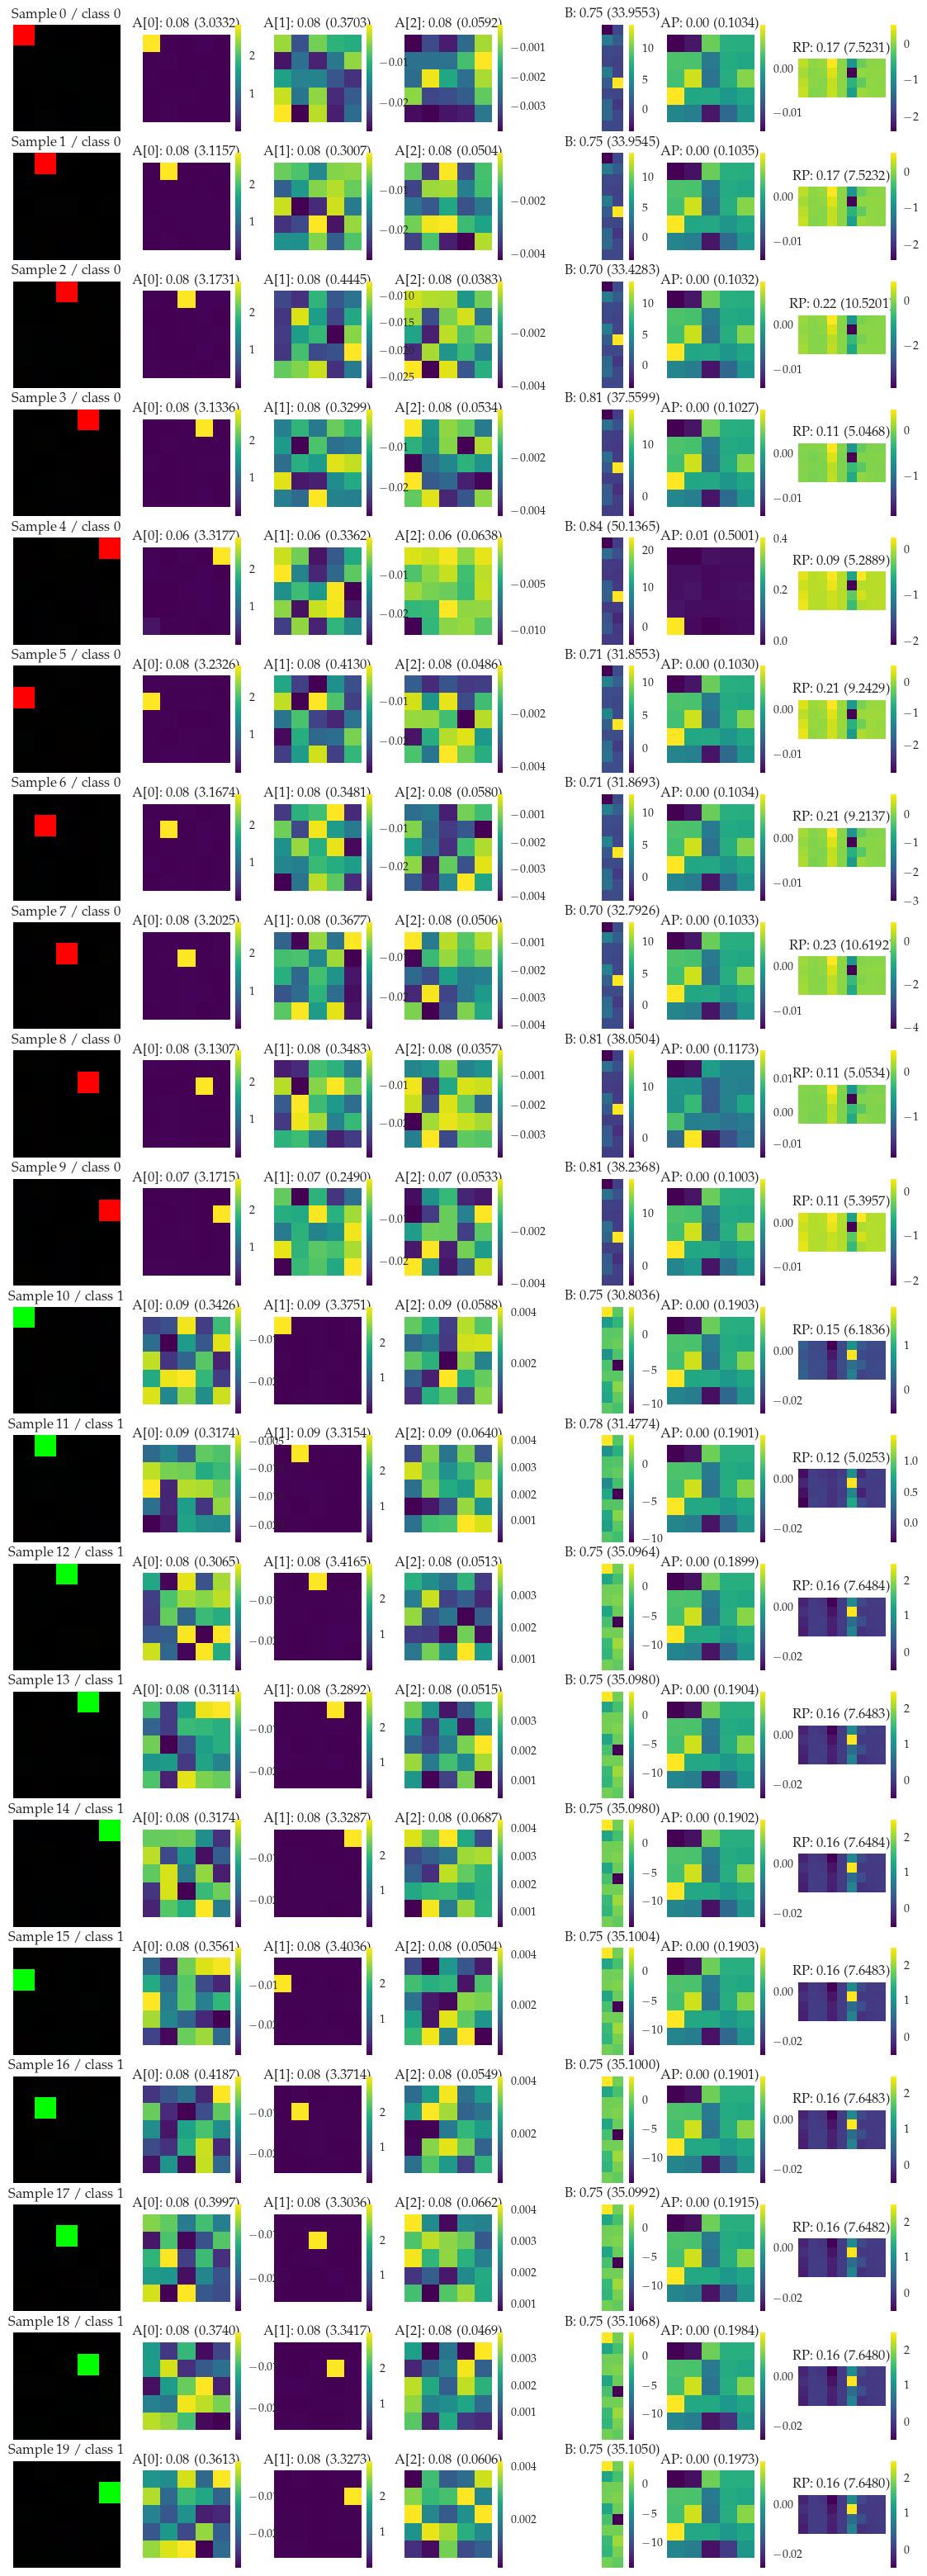

In [65]:
%autoreload
from utils import visualize_sensitivities

seed = 1

# print([(analysis_labels == c).sum() for c in range(8)])

# c = 5
# inds = analysis_labels == c
# c_analysis_images = analysis_images[inds]
# c_analysis_labels = analysis_labels[inds]

plot_images = []
plot_labels = []
n = 10
for c in range(2):
    inds = analysis_labels == c
    c_analysis_images = analysis_images[inds][:n]
    c_analysis_labels = analysis_labels[inds][:n]
    plot_images.append(c_analysis_images)
    plot_labels.append(c_analysis_labels)

plot_images = torch.concat(plot_images)
plot_labels = torch.concat(plot_labels)

n = len(plot_images)
# manual_sort = [
#     0, 7, 14, 21, 28,
#     2, 9, 16, 23, 30,
#     4, 11, 18, 25, 32,
#     6, 13, 20, 27, 34,
#     1, 8, 15, 22, 29,
#     3, 10, 17, 24, 31,
#     5, 12, 19, 26, 33,
# ]
# sort = 'appearance'
sort = None
plot_codomain = 'none'

visualize_sensitivities(models[seed], seed, plot_images, plot_labels, ape=True, rpe=True, sort=sort, n=n, plot_codomain=plot_codomain)

### Debug APE+RPE - fix zero grad

In [73]:
# Train / hybrid
seeds = range(10)
# seeds = [1]
n_epochs = 2000
report_every_n = 250
lr = 4e-2
d = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = True
aggregate_fn = 'max'

models = run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative', aggregate_fn=aggregate_fn)

Epoch 0: 0.8980551362037659
Epoch 250: 0.016910627484321594
Epoch 500: 0.003336024470627308
Epoch 750: 0.0014375830069184303
Epoch 1000: 0.0008003970142453909
Epoch 1250: 0.0005071849445812404
Epoch 1500: 0.00034744746517390013
Epoch 1750: 0.0002507148892618716
Epoch 1999: 0.00018792478658724576
Accuracy: 1.0


/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../analysis/learned_relative_position.py:170: RuntimeWarning: Mean of empty slice.
  return sf.mean()
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Without bias:
appearance (all): 97.93 +- 0.00 (97.93)
appearance (c0) : 97.98 +- 0.00 (97.98)
appearance (c1) : 98.04 +- 0.00 (98.04)
position (all): 2.07 +- 0.00 (2.07)
position (c0) : 2.02 +- 0.00 (2.02)
position (c1) : 1.96 +- 0.00 (1.96)
relative_position (all): 0.00 +- 0.00 (0.00)
relative_position (c0) : 0.00 +- 0.00 (0.00)
relative_position (c1) : 0.00 +- 0.00 (0.00)

With bias:
bias (all): 48.65 +- 0.00 (48.65)
bias (c0) : 49.10 +- 0.00 (49.10)
bias (c1) : 48.25 +- 0.00 (48.25)
appearance (all): 50.28 +- 0.00 (50.28)
appearance (c0) : 49.87 +- 0.00 (49.87)
appearance (c1) : 50.73 +- 0.00 (50.73)
position (all): 1.06 +- 0.00 (1.06)
position (c0) : 1.03 +- 0.00 (1.03)
position (c1) : 1.01 +- 0.00 (1.01)
relative_position (all): 0.00 +- 0.00 (0.00)
relative_position (c0) : 0.00 +- 0.00 (0.00)
relative_position (c1) : 0.00 +- 0.00 (0.00)



/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Visualize

In [1]:
%autoreload
from utils import visualize_sensitivities

seed = 1

n = len(analysis_images)
# n = 10
# manual_sort = [
#     0, 7, 14, 21, 28,
#     2, 9, 16, 23, 30,
#     4, 11, 18, 25, 32,
#     6, 13, 20, 27, 34,
#     1, 8, 15, 22, 29,
#     3, 10, 17, 24, 31,
#     5, 12, 19, 26, 33,
# ]
sort = 'appearance'

visualize_sensitivities(model, seed, analysis_images, analysis_labels, ape=True, rpe=True, sort=sort, n=n, snr_signal='appearance')


UsageError: Line magic function `%autoreload` not found.


#### SNR

In [79]:
%autoreload
from utils import visualize_sensitivities

# seed = 1

n = len(analysis_images)
# n = 10
# manual_sort = [
#     0, 7, 14, 21, 28,
#     2, 9, 16, 23, 30,
#     4, 11, 18, 25, 32,
#     6, 13, 20, 27, 34,
#     1, 8, 15, 22, 29,
#     3, 10, 17, 24, 31,
#     5, 12, 19, 26, 33,
# ]
sort = 'appearance'

snrs = []
for seed in seeds:
    snrs.append(visualize_sensitivities(models[seed], seed, analysis_images, analysis_labels, ape=True, rpe=True, sort=sort, n=n, snr_signal='appearance', only_snr=True))

snrs = np.array(snrs)
print(np.mean(snrs), np.std(snrs))


Image saliency SNR: 41.6383dB
Image saliency SNR: 41.4812dB
Image saliency SNR: 40.8945dB
Image saliency SNR: 41.3671dB
Image saliency SNR: 40.8666dB
Image saliency SNR: 40.8912dB
Image saliency SNR: 40.5793dB
Image saliency SNR: 40.9723dB
Image saliency SNR: 41.4958dB
Image saliency SNR: 40.9665dB
41.11527186687455 0.33262905946192


### No PE - fixed zero grad

In [75]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'none'
use_rel_pos = False

# DEBUG
# seeds = range(2)
# n_epochs = 1000
# pos_emb = 'none'
# use_rel_pos = False

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 0.7221008539199829
Epoch 2000: 0.02107856422662735
Epoch 3999: 0.002895661862567067
Accuracy: 1.0
Epoch 0: 0.7210021018981934
Epoch 2000: 0.020834438502788544
Epoch 3999: 0.002863737754523754
Accuracy: 1.0
Epoch 0: 0.7215662598609924
Epoch 2000: 0.023010142147541046
Epoch 3999: 0.0030359893571585417
Accuracy: 1.0
Epoch 0: 1.0340348482131958
Epoch 2000: 0.03455383703112602
Epoch 3999: 0.004102038219571114
Accuracy: 1.0
Epoch 0: 0.7439739108085632
Epoch 2000: 0.024278920143842697
Epoch 3999: 0.003159926040098071
Accuracy: 1.0
Epoch 0: 0.9646301865577698
Epoch 2000: 0.027945375069975853
Epoch 3999: 0.003468348877504468
Accuracy: 1.0
Epoch 0: 0.7156517505645752
Epoch 2000: 0.020956415683031082
Epoch 3999: 0.002880038693547249
Accuracy: 1.0
Epoch 0: 0.6986721754074097
Epoch 2000: 0.02056218683719635
Epoch 3999: 0.0028406335040926933
Accuracy: 1.0
Epoch 0: 0.8546369075775146
Epoch 2000: 0.02559121698141098
Epoch 3999: 0.003306324128061533
Accuracy: 1.0
Epoch 0: 0.8437312841415405
Ep

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[TriViTal(
   (patch_layer): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
   (block1): Block(
     (attention_norm): LayerNorm((1,), eps=1e-06, elementwise_affine=True)
     (ffn_norm): LayerNorm((1,), eps=1e-06, elementwise_affine=True)
     (ffn): Mlp(
       (fc1): Linear(in_features=1, out_features=1, bias=True)
       (fc2): Linear(in_features=1, out_features=1, bias=True)
       (dropout): Dropout(p=0.0, inplace=False)
     )
     (attn): Attention(
       (query): Linear(in_features=1, out_features=1, bias=True)
       (key): Linear(in_features=1, out_features=1, bias=True)
       (value): Linear(in_features=1, out_features=1, bias=True)
       (out): Linear(in_features=1, out_features=1, bias=True)
       (attn_dropout): Dropout(p=0.0, inplace=False)
       (proj_dropout): Dropout(p=0.0, inplace=False)
       (softmax): Softmax(dim=-1)
     )
   )
   (pool): AdaptiveAvgPool1d(output_size=[1])
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (fc): Linear(in_features=1, out_f

### No PE - with negative

In [8]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'none'
use_rel_pos = False

# DEBUG
# seeds = range(2)
# n_epochs = 1000
# pos_emb = 'none'
# use_rel_pos = False

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 0.7221721410751343
Epoch 2000: 0.020952610298991203
Epoch 3999: 0.0028742330614477396
Accuracy: 1.0
Epoch 0: 0.7209873199462891
Epoch 2000: 0.020705854520201683
Epoch 3999: 0.002841782057657838
Accuracy: 1.0
Epoch 0: 0.7216449975967407
Epoch 2000: 0.02286934293806553
Epoch 3999: 0.00301276333630085
Accuracy: 1.0
Epoch 0: 1.0298912525177002
Epoch 2000: 0.03404203802347183
Epoch 3999: 0.004046170972287655
Accuracy: 1.0
Epoch 0: 0.7440201640129089
Epoch 2000: 0.024118997156620026
Epoch 3999: 0.0031348750926554203
Accuracy: 1.0
Epoch 0: 0.9656798839569092
Epoch 2000: 0.027722420170903206
Epoch 3999: 0.0034386622719466686
Accuracy: 1.0
Epoch 0: 0.7159914374351501
Epoch 2000: 0.02082267589867115
Epoch 3999: 0.002857532585039735
Accuracy: 1.0
Epoch 0: 0.6986644268035889
Epoch 2000: 0.02043575793504715
Epoch 3999: 0.0028189581353217363
Accuracy: 1.0
Epoch 0: 0.855926513671875
Epoch 2000: 0.0253989789634943
Epoch 3999: 0.0032788943499326706
Accuracy: 1.0
Epoch 0: 0.8437578082084656
Epo

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### No PE

In [8]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'none'
use_rel_pos = False

# DEBUG
# seeds = range(2)
# n_epochs = 1000
# pos_emb = 'none'
# use_rel_pos = False

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n)

Epoch 0: 0.7221722602844238


Epoch 2000: 0.0209524966776371
Accuracy: 1.0
Epoch 0: 0.7209873199462891
Epoch 2000: 0.02070573717355728
Accuracy: 1.0
Epoch 0: 0.7216449975967407
Epoch 2000: 0.022870423272252083
Accuracy: 1.0
Epoch 0: 1.0298912525177002
Epoch 2000: 0.034043122082948685
Accuracy: 1.0
Epoch 0: 0.7440201640129089
Epoch 2000: 0.024119405075907707
Accuracy: 1.0
Epoch 0: 0.9656800627708435
Epoch 2000: 0.0277236457914114
Accuracy: 1.0
Epoch 0: 0.7159914374351501
Epoch 2000: 0.02082194574177265
Accuracy: 1.0
Epoch 0: 0.6986644268035889
Epoch 2000: 0.02043817564845085
Accuracy: 1.0
Epoch 0: 0.855926513671875
Epoch 2000: 0.02539939247071743
Accuracy: 1.0
Epoch 0: 0.8437576293945312
Epoch 2000: 0.030304046347737312
Accuracy: 1.0

Without bias:
appearance (all): 100.00 +- 0.00 (100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00)
appearance (c0) : 100.00 +- 0.00 (100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00)
appearance (c1) : 100.00 +- 0.00 (100.00, 10

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### APE - fix zero grad

In [76]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = False

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 0.6926138997077942
Epoch 2000: 0.020731210708618164
Epoch 3999: 0.0028638076037168503
Accuracy: 1.0


/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../analysis/learned_relative_position.py:170: RuntimeWarning: Mean of empty slice.
  return sf.mean()
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 0: 0.7174707055091858
Epoch 2000: 0.02154436893761158
Epoch 3999: 0.002951663685962558
Accuracy: 1.0
Epoch 0: 0.7090640068054199
Epoch 2000: 0.02065981924533844
Epoch 3999: 0.002849587006494403
Accuracy: 1.0
Epoch 0: 0.8727425932884216
Epoch 2000: 0.030195966362953186
Epoch 3999: 0.0036527442280203104
Accuracy: 1.0
Epoch 0: 0.755929708480835
Epoch 2000: 0.027205418795347214
Epoch 3999: 0.003416389226913452
Accuracy: 1.0
Epoch 0: 0.7783785462379456
Epoch 2000: 0.021834706887602806
Epoch 3999: 0.0029628619085997343
Accuracy: 1.0
Epoch 0: 0.7028245329856873
Epoch 2000: 0.020998334512114525
Epoch 3999: 0.0028747646138072014
Accuracy: 1.0
Epoch 0: 0.714673638343811
Epoch 2000: 0.021592235192656517
Epoch 3999: 0.0029047438874840736
Accuracy: 1.0
Epoch 0: 0.7572290897369385
Epoch 2000: 0.026167424395680428
Epoch 3999: 0.003344058059155941
Accuracy: 1.0
Epoch 0: 0.8033183217048645
Epoch 2000: 0.02244761772453785
Epoch 3999: 0.00301438570022583
Accuracy: 1.0

Without bias:
appearance (all

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[TriViTal(
   (patch_layer): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
   (block1): Block(
     (attention_norm): LayerNorm((1,), eps=1e-06, elementwise_affine=True)
     (ffn_norm): LayerNorm((1,), eps=1e-06, elementwise_affine=True)
     (ffn): Mlp(
       (fc1): Linear(in_features=1, out_features=1, bias=True)
       (fc2): Linear(in_features=1, out_features=1, bias=True)
       (dropout): Dropout(p=0.0, inplace=False)
     )
     (attn): Attention(
       (query): Linear(in_features=1, out_features=1, bias=True)
       (key): Linear(in_features=1, out_features=1, bias=True)
       (value): Linear(in_features=1, out_features=1, bias=True)
       (out): Linear(in_features=1, out_features=1, bias=True)
       (attn_dropout): Dropout(p=0.0, inplace=False)
       (proj_dropout): Dropout(p=0.0, inplace=False)
       (softmax): Softmax(dim=-1)
     )
   )
   (pool): AdaptiveAvgPool1d(output_size=[1])
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (fc): Linear(in_features=1, out_f

### APE with negative

In [9]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = False

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 0.6926035284996033
Epoch 2000: 0.020604902878403664
Epoch 3999: 0.002842067740857601
Accuracy: 1.0


/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../analysis/learned_relative_position.py:170: RuntimeWarning: Mean of empty slice.
  return sf.mean()


Epoch 0: 0.7175094485282898
Epoch 2000: 0.021411597728729248
Epoch 3999: 0.0029293906409293413
Accuracy: 1.0
Epoch 0: 0.7090679407119751
Epoch 2000: 0.02053200639784336
Epoch 3999: 0.0028276669327169657
Accuracy: 1.0
Epoch 0: 0.8722123503684998
Epoch 2000: 0.029946614056825638
Epoch 3999: 0.0036165472120046616
Accuracy: 1.0
Epoch 0: 0.7557835578918457
Epoch 2000: 0.027009902521967888
Epoch 3999: 0.003388101700693369
Accuracy: 1.0
Epoch 0: 0.7782129645347595
Epoch 2000: 0.021694261580705643
Epoch 3999: 0.0029401599895209074
Accuracy: 1.0
Epoch 0: 0.7029451131820679
Epoch 2000: 0.020871955901384354
Epoch 3999: 0.002853160258382559
Accuracy: 1.0
Epoch 0: 0.7146598696708679
Epoch 2000: 0.021454351022839546
Epoch 3999: 0.002882399596273899
Accuracy: 1.0
Epoch 0: 0.7567547559738159
Epoch 2000: 0.02598174847662449
Epoch 3999: 0.003316637594252825
Accuracy: 1.0
Epoch 0: 0.8032578825950623
Epoch 2000: 0.02230069600045681
Epoch 3999: 0.002991217654198408
Accuracy: 1.0

Without bias:
appearance (

### APE

In [9]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = False

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n)

Epoch 0: 0.692603588104248


Epoch 2000: 0.020604804158210754
Accuracy: 1.0
Epoch 0: 0.7175095081329346
Epoch 2000: 0.0214115921407938
Accuracy: 1.0
Epoch 0: 0.7090680003166199
Epoch 2000: 0.020531801506876945
Accuracy: 1.0
Epoch 0: 0.872212290763855
Epoch 2000: 0.02994842268526554
Accuracy: 1.0
Epoch 0: 0.7557835578918457
Epoch 2000: 0.02700888365507126
Accuracy: 1.0
Epoch 0: 0.7782129645347595
Epoch 2000: 0.021694589406251907
Accuracy: 1.0
Epoch 0: 0.7029451131820679
Epoch 2000: 0.020871929824352264
Accuracy: 1.0
Epoch 0: 0.7146598100662231
Epoch 2000: 0.0214548259973526
Accuracy: 1.0
Epoch 0: 0.7567547559738159
Epoch 2000: 0.025981731712818146
Accuracy: 1.0
Epoch 0: 0.8032580614089966
Epoch 2000: 0.02230077236890793
Accuracy: 1.0

Without bias:
appearance (all): 84.03 +- 9.16 (72.98, 78.25, 94.72, 74.15, 99.88, 82.92, 84.33, 93.05, 72.76, 87.27)
appearance (c0) : 78.86 +- 7.80 (74.32, 77.86, 88.73, 71.88, 63.13, 83.83, 84.02, 85.28, 72.75, 86.82)
appearance (c1) : 95.50 +- 3.59 (97.80, 93.46, 94.15, 99.73, 99.8

### RPE - fix zero grad

In [78]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'none'
use_rel_pos = True

# DEBUG
# n_epochs = 1000

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 0.6926027536392212
Epoch 2000: 0.0207512266933918
Epoch 3999: 0.002866663271561265
Accuracy: 1.0
Epoch 0: 0.9278618097305298
Epoch 2000: 0.0248568058013916
Epoch 3999: 0.003245915984734893
Accuracy: 1.0
Epoch 0: 1.2104240655899048
Epoch 2000: 0.037657011300325394
Epoch 3999: 0.0043170396238565445
Accuracy: 1.0
Epoch 0: 0.6976462006568909
Epoch 2000: 0.02112886868417263
Epoch 3999: 0.002885199850425124
Accuracy: 1.0
Epoch 0: 0.7913115620613098
Epoch 2000: 0.02754129096865654
Epoch 3999: 0.0034546973183751106
Accuracy: 1.0
Epoch 0: 0.7128941416740417
Epoch 2000: 0.02140103094279766
Epoch 3999: 0.002879682695493102
Accuracy: 1.0
Epoch 0: 0.7117297649383545
Epoch 2000: 0.020817551761865616
Epoch 3999: 0.0028600646182894707
Accuracy: 1.0
Epoch 0: 0.7011004090309143
Epoch 2000: 0.020352354273200035
Epoch 3999: 0.002792718820273876
Accuracy: 1.0
Epoch 0: 0.7098996043205261
Epoch 2000: 0.021050434559583664
Epoch 3999: 0.0028810626827180386
Accuracy: 1.0
Epoch 0: 1.1478917598724365
Epo

[TriViTal(
   (patch_layer): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
   (block1): Block(
     (attention_norm): LayerNorm((1,), eps=1e-06, elementwise_affine=True)
     (ffn_norm): LayerNorm((1,), eps=1e-06, elementwise_affine=True)
     (ffn): Mlp(
       (fc1): Linear(in_features=1, out_features=1, bias=True)
       (fc2): Linear(in_features=1, out_features=1, bias=True)
       (dropout): Dropout(p=0.0, inplace=False)
     )
     (attn): Attention(
       (query): Linear(in_features=1, out_features=1, bias=True)
       (key): Linear(in_features=1, out_features=1, bias=True)
       (value): Linear(in_features=1, out_features=1, bias=True)
       (out): Linear(in_features=1, out_features=1, bias=True)
       (attn_dropout): Dropout(p=0.0, inplace=False)
       (proj_dropout): Dropout(p=0.0, inplace=False)
       (softmax): Softmax(dim=-1)
       (rel_pos): RelPosEmb2D(
         (emb_w): RelPosEmb1D()
         (emb_h): RelPosEmb1D()
       )
     )
   )
   (pool): AdaptiveAvgPoo

### RPE with negative

In [10]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'none'
use_rel_pos = True

# DEBUG
# n_epochs = 1000

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 0.6925969123840332
Epoch 2000: 0.020624229684472084
Epoch 3999: 0.0028446349315345287
Accuracy: 1.0
Epoch 0: 0.9278261065483093
Epoch 2000: 0.02470528893172741
Epoch 3999: 0.003221086459234357
Accuracy: 1.0
Epoch 0: 1.2106820344924927
Epoch 2000: 0.037503279745578766
Epoch 3999: 0.004287607502192259
Accuracy: 1.0
Epoch 0: 0.6974081993103027
Epoch 2000: 0.020968405529856682
Epoch 3999: 0.002860670443624258
Accuracy: 1.0
Epoch 0: 0.7914978861808777
Epoch 2000: 0.027357861399650574
Epoch 3999: 0.0034279651008546352
Accuracy: 1.0
Epoch 0: 0.7127645611763
Epoch 2000: 0.02126195840537548
Epoch 3999: 0.002857315819710493
Accuracy: 1.0
Epoch 0: 0.7118509411811829
Epoch 2000: 0.020689690485596657
Epoch 3999: 0.0028384774923324585
Accuracy: 1.0
Epoch 0: 0.7010971307754517
Epoch 2000: 0.020218145102262497
Epoch 3999: 0.002770097926259041
Accuracy: 1.0
Epoch 0: 0.7099552154541016
Epoch 2000: 0.020913492888212204
Epoch 3999: 0.0028581267688423395
Accuracy: 1.0
Epoch 0: 1.1480817794799805
E

### RPE

In [10]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'none'
use_rel_pos = True

# DEBUG
# n_epochs = 1000

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n)

Epoch 0: 0.6925969123840332


Accuracy: 1.0
Epoch 0: 0.9278262257575989
Accuracy: 1.0
Epoch 0: 1.2106820344924927
Accuracy: 1.0
Epoch 0: 0.6974083185195923
Accuracy: 1.0
Epoch 0: 0.7914978861808777
Accuracy: 1.0
Epoch 0: 0.7127646803855896
Accuracy: 1.0
Epoch 0: 0.7118510603904724
Accuracy: 1.0
Epoch 0: 0.7010972499847412
Accuracy: 1.0
Epoch 0: 0.7099552750587463
Accuracy: 1.0
Epoch 0: 1.1480820178985596
Accuracy: 1.0

Without bias:
appearance (all): 100.00 +- 0.00 (100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00)
appearance (c0) : 100.00 +- 0.00 (100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00)
appearance (c1) : 100.00 +- 0.00 (100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00)
relative_position (all): 0.00 +- 0.00 (0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00)
relative_position (c0) : 0.00 +- 0.00 (0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00)
relative_position (c1) : 0.00 +- 0.00 (0.00, 0.00, 0.

### APE+RPE - fix zero grad

In [77]:
%autoreload

# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = True

models = run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 1.2760506868362427
Epoch 2000: 0.03443369269371033
Epoch 3999: 0.004104109015315771
Accuracy: 1.0


/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../analysis/learned_relative_position.py:170: RuntimeWarning: Mean of empty slice.
  return sf.mean()
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 0: 0.8980551362037659
Epoch 2000: 0.02474125847220421
Epoch 3999: 0.003184032626450062
Accuracy: 1.0
Epoch 0: 0.7707328796386719
Epoch 2000: 0.023742320016026497
Epoch 3999: 0.00312598398886621
Accuracy: 1.0
Epoch 0: 0.8472079634666443
Epoch 2000: 0.029800014570355415
Epoch 3999: 0.0036563801113516092
Accuracy: 1.0
Epoch 0: 0.7198459506034851
Epoch 2000: 0.02296244353055954
Epoch 3999: 0.003032037988305092
Accuracy: 1.0
Epoch 0: 0.6915395259857178
Epoch 2000: 0.021110057830810547
Epoch 3999: 0.002914430806413293
Accuracy: 1.0
Epoch 0: 0.6995021104812622
Epoch 2000: 0.020926324650645256
Epoch 3999: 0.0028809222858399153
Accuracy: 1.0
Epoch 0: 0.7070560455322266
Epoch 2000: 0.02143772877752781
Epoch 3999: 0.002940355334430933
Accuracy: 1.0
Epoch 0: 0.8615553975105286
Epoch 2000: 0.029621915891766548
Epoch 3999: 0.0036309233400970697
Accuracy: 1.0
Epoch 0: 0.8794817924499512
Epoch 2000: 0.027587855234742165
Epoch 3999: 0.0034506693482398987
Accuracy: 1.0

Without bias:
appearance (a

/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### SNR

In [ ]:
%autoreload
from utils import visualize_sensitivities

# seed = 1

n = len(analysis_images)
# n = 10
# manual_sort = [
#     0, 7, 14, 21, 28,
#     2, 9, 16, 23, 30,
#     4, 11, 18, 25, 32,
#     6, 13, 20, 27, 34,
#     1, 8, 15, 22, 29,
#     3, 10, 17, 24, 31,
#     5, 12, 19, 26, 33,
# ]
sort = 'appearance'

snrs = []
for seed in seeds:
    snrs.append(visualize_sensitivities(models[seed], seed, analysis_images, analysis_labels, ape=True, rpe=True, sort=sort, n=n, snr_signal='appearance', only_snr=True))

snrs = np.array(snrs)
print(np.mean(snrs), np.std(snrs))

### APE+RPE with negative

In [11]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = True

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method='input_gradient_withnegative')

Epoch 0: 1.2754610776901245
Epoch 2000: 0.03394591063261032
Epoch 3999: 0.0040551889687776566
Accuracy: 1.0
Epoch 0: 0.8981919288635254
Epoch 2000: 0.024572474882006645
Epoch 3999: 0.0031591576989740133
Accuracy: 1.0
Epoch 0: 0.7707257866859436
Epoch 2000: 0.02359362319111824
Epoch 3999: 0.0031020354945212603
Accuracy: 1.0
Epoch 0: 0.8461413383483887
Epoch 2000: 0.029515180736780167
Epoch 3999: 0.003620202885940671
Accuracy: 1.0
Epoch 0: 0.7197996377944946
Epoch 2000: 0.022811483591794968
Epoch 3999: 0.0030079949647188187
Accuracy: 1.0
Epoch 0: 0.6913833618164062
Epoch 2000: 0.020982343703508377
Epoch 3999: 0.0028926099184900522
Accuracy: 1.0
Epoch 0: 0.6992994546890259
Epoch 2000: 0.020786670967936516
Epoch 3999: 0.0028578918427228928
Accuracy: 1.0
Epoch 0: 0.7071033716201782
Epoch 2000: 0.02130769193172455
Epoch 3999: 0.0029183775186538696
Accuracy: 1.0
Epoch 0: 0.8632459044456482
Epoch 2000: 0.02952188439667225
Epoch 3999: 0.0036119315773248672
Accuracy: 1.0
Epoch 0: 0.8794789314270

### APE+RPE

In [11]:
# Train / hybrid
seeds = range(10)
n_epochs = 4000
report_every_n = 2000
lr = 4e-3
d = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = True

run_appearance(seeds, n_epochs, lr, d, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n)

Epoch 0: 1.2754610776901245
Epoch 2000: 0.033946048468351364
Accuracy: 1.0
Epoch 0: 0.8981919884681702
Epoch 2000: 0.024572603404521942
Accuracy: 1.0
Epoch 0: 0.7707258462905884
Epoch 2000: 0.023593934252858162
Accuracy: 1.0
Epoch 0: 0.8461412787437439
Epoch 2000: 0.029516253620386124
Accuracy: 1.0
Epoch 0: 0.7197996377944946
Epoch 2000: 0.022811444476246834
Accuracy: 1.0
Epoch 0: 0.691383421421051
Epoch 2000: 0.02098246105015278
Accuracy: 1.0
Epoch 0: 0.6992994546890259
Epoch 2000: 0.020786743611097336
Accuracy: 1.0
Epoch 0: 0.7071033716201782
Epoch 2000: 0.021307887509465218
Accuracy: 1.0
Epoch 0: 0.8632458448410034
Epoch 2000: 0.02952173724770546
Accuracy: 1.0
Epoch 0: 0.879478931427002
Epoch 2000: 0.027416177093982697
Accuracy: 1.0

Without bias:
appearance (all): 85.07 +- 11.08 (73.00, 94.00, 93.88, 71.10, 65.52, 82.96, 95.72, 84.76, 99.17, 90.59)
appearance (c0) : 78.12 +- 8.14 (73.22, 77.23, 90.03, 69.29, 63.57, 82.72, 82.96, 84.97, 71.05, 86.18)
appearance (c1) : 95.73 +- 3.22 